In [110]:
#!pip install streamlit-plotly-events

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import streamlit as st

# from matplotlib import style
# style.use('ggplot')

# Below line of code sets the notebook to not give warnings while running any code.
import warnings
warnings.filterwarnings('ignore')

# Below line of code makes the notebook print the graph below the code instead of a pop-up graph.
%matplotlib inline

# Below code removes the limit of printing number of columns in pandas dataframe.
pd.options.display.max_columns = None

In [112]:
main_raw = pd.read_excel('University Benchmarking Dashboard - Formatted.xlsx', 'HE Dataset', header = 4)
main_raw.drop("Unnamed: 0", inplace = True, axis = 1)
main_raw = main_raw[main_raw['University'].notna()]

In [113]:
main_raw.reset_index(drop = True, inplace = True)

In [114]:
discard = ["Year"]
main = main_raw[~main_raw["University"].str.contains(' '.join(discard))]
 
main.reset_index(drop = True, inplace = True)

In [115]:
for cols in main.columns:
    if "Unnamed" in cols:
        main.drop(cols, axis = 1, inplace = True)

In [116]:
groups = pd.read_excel('University Benchmarking Dashboard - Formatted.xlsx', 'Grouping', header = 1)
groups.dropna(axis=1, how='all', inplace = True)
#groups.head(5)

### Creating groups
List of groups:
1) Association:
- Russell Group
- Post 1992 with Polytechnic roots
- Post 1992 with Central Institution Roots
- Post 1992 - Other </br>

2) Year of establishment:
- Ancient Universities (pre-1800)
- Red brick Universities (1800-1960)
- Plate Glass (1960-1992) 
- Post 1992 All</br>

3) Location:
- Inside London
- Outside London</br>

4) Funds:
- Private placement
- Public bonds

In [117]:
# Defining groups as per association

Russell = []
for i in range(len(groups["Russell Group"])):
    if type(groups["Russell Group"][i]) == str:
        Russell.append(groups["Russell Group"][i])
        
Post_1992_poly_roots = []
for i in range(len(groups["Post 1992 with Polytechnic roots"])):
    if type(groups["Post 1992 with Polytechnic roots"][i]) == str:
        Post_1992_poly_roots.append(groups["Post 1992 with Polytechnic roots"][i])

Post_1992_central_inst_roots = []
for i in range(len(groups["Post 1992 with Central Institution Roots"])):
    if type(groups["Post 1992 with Central Institution Roots"][i]) == str:
        Post_1992_central_inst_roots.append(groups["Post 1992 with Central Institution Roots"][i])
        
Post_1992_other = []
for i in range(len(groups["Post 1992 - Other"])):
    if type(groups["Post 1992 - Other"][i]) == str:
        Post_1992_other.append(groups["Post 1992 - Other"][i])
        
# Defining groups as per establishment

ancient = []
for i in range(len(groups["Ancient Universities"])):
    if type(groups["Ancient Universities"][i]) == str:
        ancient.append(groups["Ancient Universities"][i])
        
red_brick = []
for i in range(len(groups["Red brick Universities"])):
    if type(groups["Red brick Universities"][i]) == str:
        red_brick.append(groups["Red brick Universities"][i])
        
glass_plate = []
for i in range(len(groups["Plate Glass"])):
    if type(groups["Plate Glass"][i]) == str:
        glass_plate.append(groups["Plate Glass"][i])
        
post_1992_all = []
for i in range(len(groups["Post 1992 All"])):
    if type(groups["Post 1992 All"][i]) == str:
        post_1992_all.append(groups["Post 1992 All"][i])
        
# Defining groups as per location

in_london = []
for i in range(len(groups["London Subset"])):
    if type(groups["London Subset"][i]) == str:
        in_london.append(groups["London Subset"][i])
        
# Defining groups as per funds

private = []
for i in range(len(groups["Private Placement"])):
    if type(groups["Private Placement"][i]) == str:
        private.append(groups["Private Placement"][i])
        
public = []
for i in range(len(groups["Public Bond"])):
    if type(groups["Public Bond"][i]) == str:
        public.append(groups["Public Bond"][i])

In [118]:
print("Russell: ", len(Russell))
print("Post_1992_poly_roots: ", len(Post_1992_poly_roots))
print("Post_1992_central_inst_roots: ", len(Post_1992_central_inst_roots))
print("Post_1992_other: ", len(Post_1992_other))
print("ancient: ", len(ancient))
print("red_brick: ", len(red_brick))
print("glass_plate: ", len(glass_plate))
print("post_1992_all: ", len(post_1992_all))
print("in_london: ", len(in_london))
print("private: ", len(private))
print("public: ", len(public))

Russell:  24
Post_1992_poly_roots:  33
Post_1992_central_inst_roots:  5
Post_1992_other:  40
ancient:  6
red_brick:  9
glass_plate:  23
post_1992_all:  78
in_london:  26
private:  24
public:  8


In [119]:
# Adding groups to in dataset
# As per association

main['Association'] = 'Other'

for i in range(len(main.index)):
    if main["University"][i] in Russell:
        main['Association'][i] = "Russell Group"
    elif main["University"][i] in Post_1992_poly_roots:
        main['Association'][i] = "Post 1992 with polytechnic roots"
    elif main["University"][i] in Post_1992_central_inst_roots:
        main['Association'][i] = "Post 1992 with central institution roots"
    elif main["University"][i] in Post_1992_other:
        main['Association'][i] = "Post 1992 - other"
    else:
        pass

# As per establishment

main['Established'] = 'Other'

for i in range(len(main.index)):
    if main["University"][i] in ancient:
        main['Established'][i] = "Ancient(pre 1860)"
    elif main["University"][i] in red_brick:
        main['Established'][i] = "Red Brick(1860-1960)"
    elif main["University"][i] in glass_plate:
        main['Established'][i] = "Glass Plate(1960-1992)"
    elif main["University"][i] in post_1992_all:
        main['Established'][i] = "Post 1992 - All"
    else:
        pass
    
# As per location

main['Location'] = 'Other'

for i in range(len(main.index)):
    if main["University"][i] in in_london:
        main['Location'][i] = "London"
    else:
        pass
    
# As per funds

main['Funding'] = 'Other'

for i in range(len(main.index)):
    if main["University"][i] in private:
        main['Funding'][i] = "Private Placement"
    elif main["University"][i] in public:
        main['Funding'][i] = "Public Bonds"
    else:
        pass

In [120]:
print("Categories in Association: ")
print(main['Association'].value_counts())
print("========================================")
print("Categories in Established: ")
print(main['Established'].value_counts())
print("========================================")
print("Categories in Location: ")
print(main['Location'].value_counts())
print("========================================")
print("Categories in Funding: ")
print(main['Funding'].value_counts())

Categories in Association: 
Other                                       424
Post 1992 with polytechnic roots            248
Post 1992 - other                           240
Russell Group                               192
Post 1992 with central institution roots     40
Name: Association, dtype: int64
Categories in Established: 
Post 1992 - All           528
Other                     328
Glass Plate(1960-1992)    168
Red Brick(1860-1960)       72
Ancient(pre 1860)          48
Name: Established, dtype: int64
Categories in Location: 
Other     944
London    200
Name: Location, dtype: int64
Categories in Funding: 
Other                896
Private Placement    184
Public Bonds          64
Name: Funding, dtype: int64


In [121]:
main.head(2)

University       UKPRN Short Name  Country  \
0     The University of Oxford  10007774.0     Oxford  England   
1  The University of Cambridge  10007788.0  Cambridge  England   

    Financial Year End Academic Year  Total Income  Total Expenditure  \
0  2023-07-31 00:00:00       2022/23  2.924682e+09       2.581179e+09   
1  2023-07-31 00:00:00       2022/23  2.518255e+09       2.317852e+09   

   Operating surplus/ (deficit)  Tuition fees and education contracts  \
0                   343503000.0                           504244000.0   
1                   200403000.0                           390118000.0   

   Funding body grants  Research grants and contracts  Other income  \
0          229247000.0                    789044000.0  1.034740e+09   
1          207607000.0                    569503000.0  1.169008e+09   

   Investment income  Donations and endowments Total Income Check  \
0        180515000.0               186892000.0                 OK   
1         49665000.0               132354000.0                 OK   

            UK  International          EU  Other (Research)  \
0  144971000.0    199563000.0  33840000.0        57941000.0   
1  132651000.0    182201000.0  27905000.0        25745000.0   

   Other (Non-Credit Bearing Course Fees)  Other - FE Course Fees  \
0                              67929000.0                     0.0   
1                              21616000.0                     0.0   

   Total Other Tuition Fee Check   Staff Costs  Interest Paid  \
0  125870000.0                OK  1.120000e+09    -32574000.0   
1   47361000.0                OK  1.020640e+09    -21006000.0   

   Interest element of finance lease and service concession payments  \
0                                                0.0                   
1                                                0.0                   

   Repayments of amounts borrowed  \
0                     -21200000.0   
1                             0.0   

   Capital element of finance lease and service concession payments  \
0                                                0.0                  
1                                                0.0                  

   Total Debt Service  Net cash inflow from operating activities  \
0         -53774000.0                                 -3088000.0   
1         -21006000.0                                 26016000.0   

   Non-current Investments  Current investments   Cash and cash equivalents   \
0             5.059987e+09           201138000.0                 650578000.0   
1             4.864760e+09           829861000.0                 399259000.0   

   Total net assets/(liabilities)  Pension provisions  \
0                    5.384402e+09         576409000.0   
1                    7.161851e+09         427467000.0   

   Total net assets/(liabilities) excl. pensions  Bank overdrafts   \
0                                   5.960811e+09        17847000.0   
1                                   7.589318e+09               0.0   

   Bank loans and external borrowing  \
0                          7447000.0   
1                                0.0   

   Obligations under finance leases and service concessions  \
0                                                0.0          
1                                            62000.0          

   Loans repayable to funding council (including financial transactions)  \
0                                                0.0                       
1                                                0.0                       

   Bank loans and external borrowing   \
0                        1.198406e+09   
1                        8.778490e+08   

   Obligations under finance leases and service concessions   \
0                                                0.0           
1                                           898000.0           

   Loans repayable to funding council (including financial transactions)   \
0                                                0.0       

In [122]:
cash_cols = ["University", "Country", "Academic Year", "Total Income", "Total Expenditure", "Operating surplus/ (deficit)",
            "Tuition fees and education contracts", "Funding body grants", "Research grants and contracts",
            "Other income", "Investment income", "Donations and endowments", "UK", "International",
             "EU", "Other (Research)", "Other (Non-Credit Bearing Course Fees)", "Other - FE Course Fees",
             "Total Other", "Staff Costs", "Staff Costs / Total Expenditure", 
             "Total UK  ", "European Union", "Non-European Union", "Total", "Association", 
             "Established", "Location", "Funding", "Times Ranking 2023"]

sub_main = main[cash_cols]

sub_main.rename(columns={"Operating surplus/ (deficit)": "Surplus/Deficit", "UK": "Fees_UK",
                         "International": "Fees_international", "EU": "Fees_EU", "Other (Research)": "Fees_research/other",
                         "Other (Non-Credit Bearing Course Fees)": "Fees_non_credit_bearing_courses/other",
                         "Other - FE Course Fees": "Fees_FE_course/other", "Other - FE Course Fees" : "Fees_FE_courses/other",
                         "Total Other" : "Fees_total_other", "Total UK  ": "UK_students", "European Union": "EU_students",
                         "Non-European Union": "Non-EU_students", "Total": "Total_students"}, inplace = True)

sub_main["UK_fps"] =  sub_main["Fees_UK"]/sub_main["UK_students"]
sub_main["EU_fps"] =  sub_main["Fees_EU"]/sub_main["EU_students"]
sub_main["Non-EU_fps"] =  sub_main["Fees_international"]/sub_main["Non-EU_students"]
sub_main.head(3)

University  Country Academic Year  Total Income  \
0     The University of Oxford  England       2022/23  2.924682e+09   
1  The University of Cambridge  England       2022/23  2.518255e+09   
2    University College London  England       2022/23  1.968344e+09   

   Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
0       2.581179e+09      343503000.0                           504244000.0   
1       2.317852e+09      200403000.0                           390118000.0   
2       1.752046e+09      216298000.0                           911977000.0   

   Funding body grants  Research grants and contracts  Other income  \
0          229247000.0                    789044000.0  1.034740e+09   
1          207607000.0                    569503000.0  1.169008e+09   
2          236720000.0                    526713000.0  2.359010e+08   

   Investment income  Donations and endowments      Fees_UK  \
0        180515000.0               186892000.0  144971000.0   
1         49665000.0               132354000.0  132651000.0   
2         28079000.0                28954000.0  180082000.0   

   Fees_international     Fees_EU  Fees_research/other  \
0         199563000.0  33840000.0           57941000.0   
1         182201000.0  27905000.0           25745000.0   
2         647592000.0  15212000.0           37501000.0   

   Fees_non_credit_bearing_courses/other  Fees_FE_courses/other  \
0                             67929000.0                    0.0   
1                             21616000.0                    0.0   
2                             31590000.0                    0.0   

   Fees_total_other   Staff Costs  Staff Costs / Total Expenditure  \
0       125870000.0  1.120000e+09                         0.433910   
1        47361000.0  1.020640e+09                         0.440339   
2        69091000.0  9.172050e+08                         0.523505   

   UK_students  EU_students  Non-EU_students  Total_students    Association  \
0          0.0          0.0              0.0             0.0  Russell Group   
1          0.0          0.0              0.0             0.0  Russell Group   
2          0.0          0.0              0.0             0.0  Russell Group   

         Established Location       Funding  Times Ranking 2023  UK_fps  \
0  Ancient(pre 1860)    Other  Public Bonds                 1.0     inf   
1  Ancient(pre 1860)    Other  Public Bonds                 3.0     inf   
2              Other   London  Public Bonds                 7.0     inf   

   EU_fps  Non-EU_fps  
0     inf         inf  
1     inf         inf  
2     inf         inf

In [123]:
columns_to_scale = ["Total Income", "Total Expenditure", "Surplus/Deficit", "Tuition fees and education contracts",
                    "Funding body grants", "Research grants and contracts", "Other income", "Investment income",
                    "Donations and endowments", "Fees_UK", "Fees_international", "Fees_EU", "Fees_research/other",
                    "Fees_non_credit_bearing_courses/other", "Fees_FE_courses/other", "Fees_total_other", "Staff Costs"]

sub_main[columns_to_scale] = sub_main[columns_to_scale]/1000000

In [124]:
sub_main = sub_main[sub_main["Academic Year"] != "2015/16"]

sub_main["Association"].unique()

array(['Russell Group', 'Other', 'Post 1992 with polytechnic roots',
       'Post 1992 - other', 'Post 1992 with central institution roots'],
      dtype=object)

In [125]:
len(sub_main[sub_main["Association"] == "Post 1992 - other"])

210

In [126]:
len(sub_main[sub_main["Association"] == "Other"])

371

In [127]:
post_1992_other = sub_main[sub_main["Association"] == "Post 1992 - other"]
non_associated = sub_main[sub_main["Association"] == "Other"]

Text(0.5, 1.0, 'other in 2022/23')

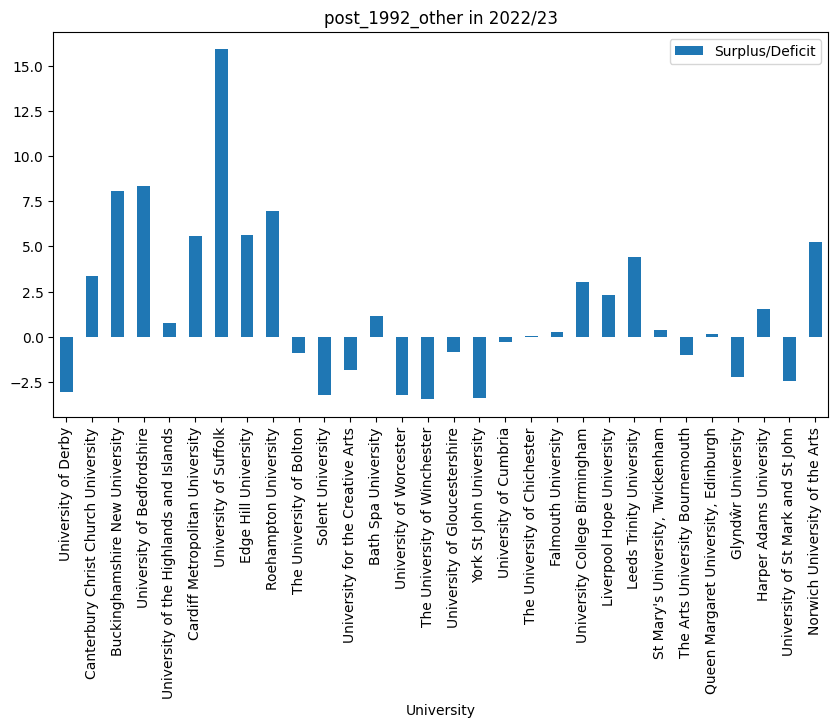

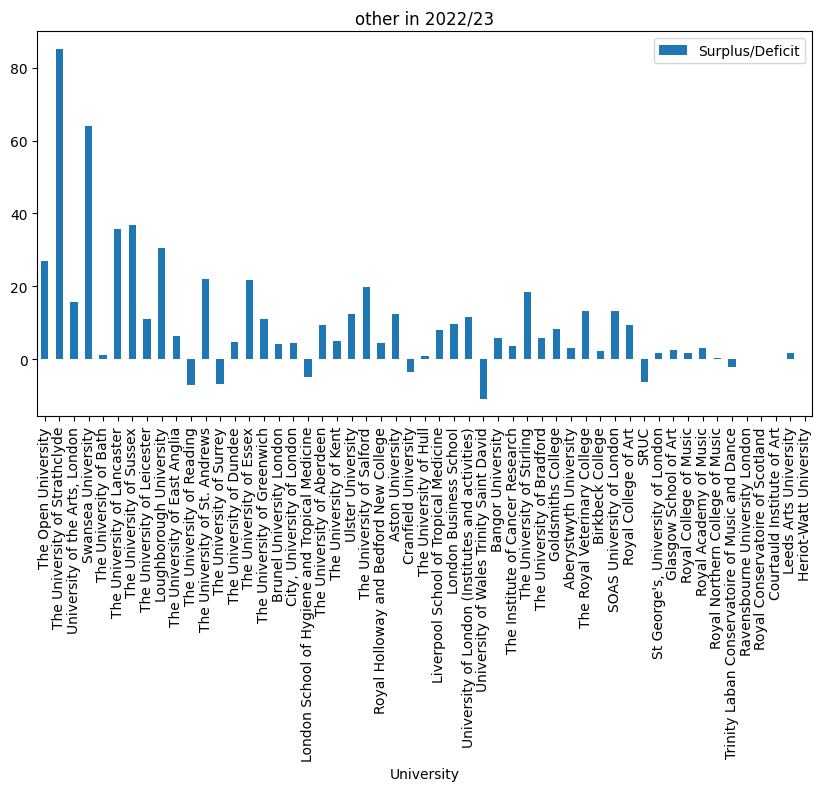

In [128]:
post_1992_other[post_1992_other["Academic Year"] == "2022/23"].plot.bar(x = "University", y = "Surplus/Deficit", figsize=(10,5))
plt.title('post_1992_other in 2022/23')
non_associated[non_associated["Academic Year"] == "2022/23"].plot.bar(x = "University", y = "Surplus/Deficit", figsize=(10,5))
plt.title('other in 2022/23')

Text(0.5, 1.0, 'other in 2021/22')

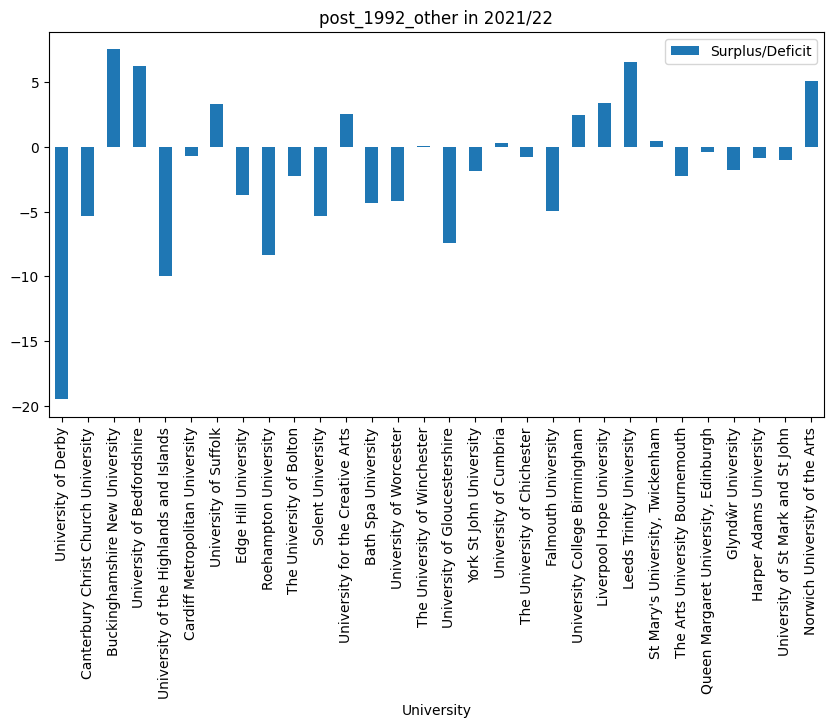

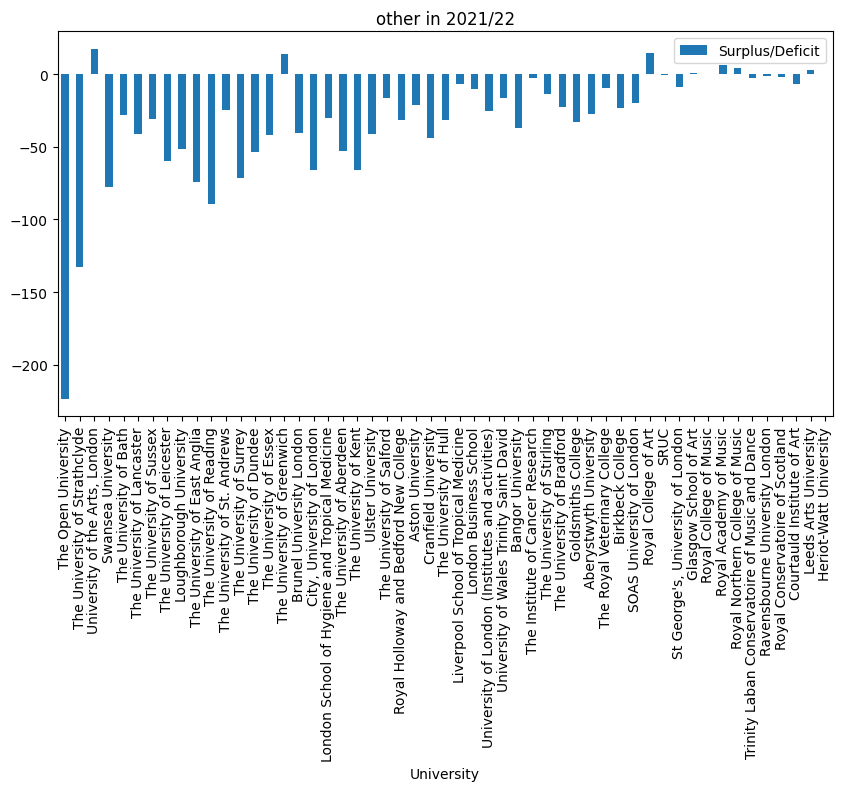

In [129]:
post_1992_other[post_1992_other["Academic Year"] == "2021/22"].plot.bar(x = "University", y = "Surplus/Deficit", figsize=(10,5))
plt.title('post_1992_other in 2021/22')
non_associated[non_associated["Academic Year"] == "2021/22"].plot.bar(x = "University", y = "Surplus/Deficit", figsize=(10,5))
plt.title('other in 2021/22')

In [130]:
temp1 = post_1992_other[post_1992_other["Academic Year"] == "2022/23"][
    ["University", "Total Income", "Total Expenditure", "Surplus/Deficit", "Tuition fees and education contracts", "Fees_UK",
     "Fees_international", "Fees_EU", "Fees_non_credit_bearing_courses/other", "Fees_total_other", "UK_students", "EU_students",
     "Non-EU_students", "Total_students", "UK_fps", "EU_fps", "Non-EU_fps", "Times Ranking 2023"]]

temp1.reset_index(drop = True, inplace = True)
temp1["Grade"] = ""

for i in range(len(temp1.index)):
    if temp1["Surplus/Deficit"][i] > 0:
        temp1["Grade"][i] = "Positive"
    else:
        temp1["Grade"][i] = "Negative"

In [131]:
temp2 = non_associated[non_associated["Academic Year"] == "2022/23"][
    ["University", "Total Income", "Total Expenditure", "Surplus/Deficit", "Tuition fees and education contracts", "Fees_UK",
     "Fees_international", "Fees_EU", "Fees_non_credit_bearing_courses/other", "Fees_total_other", "UK_students", "EU_students",
     "Non-EU_students", "Total_students", "UK_fps", "EU_fps", "Non-EU_fps", "Times Ranking 2023"]]

temp2.reset_index(drop = True, inplace = True)
temp2["Grade"] = ""
       
for i in range(len(temp2.index)):
    if temp2["Surplus/Deficit"][i] > 0:
        temp2["Grade"][i] = "Positive"
    else:
        temp2["Grade"][i] = "Negative"

In [132]:
temp1.groupby("Grade").mean()

Total Income  Total Expenditure  Surplus/Deficit  \
Grade                                                        
Negative     95.056333          97.206083        -2.149750   
Positive    112.036111         107.969389         4.066722   

          Tuition fees and education contracts  Fees_UK  Fees_international  \
Grade                                                                         
Negative                             71.579333  51.9800           16.136667   
Positive                             82.409889  66.3105           12.920278   

           Fees_EU  Fees_non_credit_bearing_courses/other  Fees_total_other  \
Grade                                                                         
Negative  1.597000                               1.526917          1.865667   
Positive  2.728778                               0.343389          0.450333   

          UK_students  EU_students  Non-EU_students  Total_students  UK_fps  \
Grade                                                                         
Negative          0.0          0.0              0.0             0.0     NaN   
Positive          0.0          0.0              0.0             0.0     NaN   

          EU_fps  Non-EU_fps  Times Ranking 2023  
Grade                                             
Negative     NaN         NaN           99.166667  
Positive     NaN         NaN           84.937500

In [133]:
temp2.groupby("Grade").mean()

Total Income  Total Expenditure  Surplus/Deficit  \
Grade                                                        
Negative    151.132200         155.375000        -4.242800   
Positive    230.357256         217.146977        13.210279   

          Tuition fees and education contracts    Fees_UK  Fees_international  \
Grade                                                                           
Negative                             59.983600  31.692000           21.491300   
Positive                            127.863767  63.102698           51.537837   

           Fees_EU  Fees_non_credit_bearing_courses/other  Fees_total_other  \
Grade                                                                         
Negative  2.635900                               3.064600          4.164400   
Positive  4.896209                               2.994674          4.676767   

          UK_students  EU_students  Non-EU_students  Total_students  UK_fps  \
Grade                                                                         
Negative          0.0          0.0              0.0             0.0     NaN   
Positive          0.0          0.0              0.0             0.0     NaN   

          EU_fps  Non-EU_fps  Times Ranking 2023  
Grade                                             
Negative     NaN         NaN           53.250000  
Positive     NaN         NaN           47.129032

#### Department short forms: 
1) science(PS, SP, MS, OS, AG, MST)
2) social science(SS, RL, GO)
3) tech(CS, STEM, AV, TECH)
4) business(HT, BS)
5) law(LL)
6) medical(MED, NS, HS)
7) vet(VS)
8) arts(AR, CAR, PA, JO, LA, MU, ME)
9) finance(FA, EC)
10) education(ED)

- Health and social care - HS
- Arts - AR
- Hospitality and tourism - HT
- computer - CS
- business - BS
- Journalism - JO
- Education - ED
- Stem - STEM
- Law - LL
- Social Sciences - SS
- Pyschology - PS
- Sports - SP
- Language - LA
- Aviation - AV
- Creative arts - CAR
- Marine Sciences - MS
- Finance and accounting - FA
- Medical school - MED
- Engineering - TECH
- Religion - RL
- Music - MU
- Other Science - OS
- Governane - GO
- Performing Arts - PA
- Agriculture -AG
- Veternary Sciences - VS
- Media - ME
- Economics - EC
- Museum Studies - MST

In [134]:
temp1_dict = {
    'University of Derby' : "HS-AR-HT-CS-BS-JO-ED-STEM-LL-SS-PS-SP",
    'Canterbury Christ Church University' : "AR-ED-LA-HS-TECH-LL-PS-NS",
    'Buckinghamshire New University' : "AR-AV-BS-LL-CAR-TECH-HS-SS-HT",
    'University of Bedfordshire' : "BS-CAR-ED-SP-HS",
    'University of the Highlands and Islands' : "MS-ED-TECH-BS-HS-SS",
    'Cardiff Metropolitan University' : "FA-BS-HT",
    'University of Suffolk' : "SS-TECH-BS-AR-HS",
    'Edge Hill University' : "BS-TECH-SS-MED-AR-CAR-LA-PS-ED-HS-LL-SP",
    'Roehampton University' : "AR-SS-BS-LL-ED-HS-PS-TECH-HS",
    'The University of Bolton' : "TECH-HS-AR-FA-BS-LL-ED-PS-SP-RL-MED",
    'Solent University' : "AR-MU-BS-LL-SS-HS-STEM-CAR-SP-MS",
    'University for the Creative Arts' : "CAR-BS-TECH",
    'Bath Spa University' : "BS-AR-CAR-ED-MU-SS-LL-PS-HS",
    'University of Worcester' : "HS-AR-ED-SS-PS-SP-BS-MED-OS",
    'The University of Winchester' : "ED-AR-BS-HS-LL-SS-GO",
    'University of Gloucestershire' : "BS-SS-TECH-FA-LL-CAR-ED-HS",
    'York St John University' : "AR-ED-LA-PS-SS-TECH-HS-OS-BS",
    'University of Cumbria' : "HS-ED-AR-SS-BS-GO-OS",
    'The University of Chichester' : "BS-ED-SS-CAR-LL-CAR-PA-STEM-GO-MU-RL-PS-SP",
    'Falmouth University' : "MU-PA-BS-AR-CAR",
    'University College Birmingham' : "BS-TECH-HS-PS-SP-ED",
    'Liverpool Hope University' : "BS-CAR-PA-ED-OS-HS-SP-AR-LL-STEM-PS-SS-ED",
    'Leeds Trinity University' : "LA-ED-AR-LL-TECH-SS-FA-PS-HS-BS-JO-OS-RL",
    "St Mary's University, Twickenham" : "BS-LL-SP-HS-TECH-ED-AR",
    'The Arts University Bournemouth' : "AR-CAR-PA",
    'Queen Margaret University, Edinburgh' : "AR-BS-SS-PS-ED-PA-HS",
    'Glyndŵr University' : "AR-TECH-SS-OS",
    'Harper Adams University' : "AG-OS-TECH-VS",
    'University of St Mark and St John' : "AR-SS-BS-LL-OS-ED-HS-SP",
    'Norwich University of the Arts' : "PA-AR-CAR-TECH-MU-PS"
}

temp1["dept"] = ""

for i in range(len(temp1.index)):
    for v,k in temp1_dict.items():
        if temp1["University"][i] == v:
            temp1["dept"][i] = k

temp1["science"] = 0
temp1["social_science"] = 0
temp1["tech"] = 0
temp1["business"] = 0
temp1["law"] = 0
temp1["med"] = 0
temp1["vet"] = 0
temp1["art"] = 0
temp1["finance"] = 0
temp1["teaching"] = 0

science_ = ["PS", "SP", "MS", "OS", "AG", "MST"]
ss_ = ["SS", "RL", "GO"]
tech_ = ["CS", "STEM", "AV", "TECH"]
busi_ = ["HT", "BS"]
law_ = ["LL"]
med_ = ["MED", "NS", "HS"]
vet_ = ["VS"]
art_ = ["AR", "CAR", "PA", "JO", "LA", "MU", "ME"]
finance_ = ["FA", "EC"]
edu_ = ["ED"]

for i in range(len(temp1.index)):
    for j in range(len(science_)):
        if science_[j] in temp1["dept"][i].split("-"):
            temp1["science"][i] = 1
            
    for j in range(len(ss_)):
        if ss_[j] in temp1["dept"][i].split("-"):
            temp1["social_science"][i] = 1
            
    for j in range(len(tech_)):
        if tech_[j] in temp1["dept"][i].split("-"):
            temp1["tech"][i] = 1
            
    for j in range(len(busi_)):
        if busi_[j] in temp1["dept"][i].split("-"):
            temp1["business"][i] = 1
            
    for j in range(len(law_)):
        if law_[j] in temp1["dept"][i].split("-"):
            temp1["law"][i] = 1
            
    for j in range(len(med_)):
        if med_[j] in temp1["dept"][i].split("-"):
            temp1["med"][i] = 1
            
    for j in range(len(vet_)):
        if vet_[j] in temp1["dept"][i].split("-"):
            temp1["vet"][i] = 1
            
    for j in range(len(art_)):
        if art_[j] in temp1["dept"][i].split("-"):
            temp1["art"][i] = 1
            
    for j in range(len(finance_)):
        if finance_[j] in temp1["dept"][i].split("-"):
            temp1["finance"][i] = 1
            
    for j in range(len(edu_)):
        if edu_[j] in temp1["dept"][i].split("-"):
            temp1["teaching"][i] = 1
          
        
temp1["variety_score"] = 0

temp1["variety_score"] = (temp1["science"] + temp1["social_science"] + temp1["tech"] + temp1["business"] + temp1["law"] +
                          temp1["med"] + temp1["vet"] + temp1["art"] + temp1["finance"] + temp1["teaching"])

temp1.drop("dept", axis = 1, inplace = True)

In [135]:
temp2_dict = {
    'The Open University' : "AR-SS-BS-LL-STEM-ED-LA-HS-SP-ME",
    'The University of Strathclyde' : "FA-EC-GO-BS",
    'University of the Arts, London' : "AR-ME-CAR",
    'Swansea University' : "SS-MED-HS-TECH",
    'The University of Bath' : "TECH-SS-OS-PS-ED-EC-GO-LA-FA-BS",
    'The University of Lancaster' : "AR-SS-LA-LL-RL-HS-MED-FA-BS-ED-EC-GO-STEM-PS-OS",
    'The University of Sussex' : "FA-EC-BS-ED-SS-TECH-OS-LL-ME-AR-PA-CAR-PS",
    'The University of Leicester' : "SS-AR-CAR-PA-LA-BS-LL-ED-GO-ME-MST",
    'Loughborough University' : "AV-TECH-BS-OS-ME-LL-CAR-LA-GO-SS-SP-HS-ED",
    'The University of East Anglia' : "AR-SS-MED-HS-STEM-OSBS-EC-PS-LL-ED",
    'The University of Reading' : "AG-OS-CAR-AR-ME-LA-TECH-ED-PA-LL-PS",
    'The University of St. Andrews' : "AR-SS-OS-BS-RL-FA-EC-LA-CAR-PA-ED-GO-STEM-MED-MU-PS",
    'The University of Surrey' : "AR-SS-GO-PA-HT-LA-MU-ME-EC-LL-BS-STEM-OS-HS-MED-PS-VS-ED",
    'The University of Dundee' : "AR-CAR-BS-HS-SS-LL-LA-ED-OS-GO-PS-MED-STEM",
    'The University of Essex' : "ED-AR-SS-LL-CAR-PR-LA-RL-HT-STEM-OS-PS-HS-SP-EC-BS-GO",
    'The University of Greenwich' : "BS-ED-HS-SS-STEM-CAR-LL-PA",
    'Brunel University London' : "HS-AV-AR-OS-BS-MED-LA-ME-CAR-LL-FA-EC-ED-PA-JO-STEM-MU-GO-PS",
    'City, University of London' : "GO-BS-ME-CAR-HS-PS-STEM-LL",
    'London School of Hygiene and Tropical Medicine' : "HS-MED",
    'The University of Aberdeen' : "OS-BS-AR-ED-STEM-LA-LL-MED-PS-SS",
    'The University of Kent' : "AR-LA-CAR-OS-SP-MED-STEM-BS-EC-GO-PS-LL-JO",
    'Ulster University' : "AR-SS-TECH-HS-OS-BS",
    'The University of Salford': "AR-ME-CAR-OS-TECH-HS-BS-LA",
    'Royal Holloway and Bedford New College' : "OS-BS-LA-PA-EC-HS-LL-STEM-ME-MU-RL-GO-PS-SS",
    'Aston University' : "BS-LL-MED-HS-OS-TECH-SS-LA-SP",
    'Cranfield University' : "AV-AG-BS-CAR-EC-FA-OS-STEM-PS",
    'The University of Hull' : "AR-LL-ED-SS-BS-GO-MED-PS-HS-SP-TECH-OS",
    'Liverpool School of Tropical Medicine' : "MED-HS",
    'London Business School' : "FA-EC-GO",
    'University of London (Institutes and activities)' : "LL-LA-SS-GO",
    'University of Wales Trinity Saint David' : "BS-TECH-HS-HT-ME-CAR-PA-RL-PS-ED-OS",
    'Bangor University' : "BS-SS-AR-LA-ED-TECH-MS-OS-HS-PS-SP-MED",
    'The Institute of Cancer Research' : "MED-HS",
    'The University of Stirling' : "AR-SS-HS-SP-OS-BS",
    'The University of Bradford' : "TECH-ME-HS-OS-LL-SS",
    'Goldsmiths College' : "AR-CAR-LA-MU-PA-SS-GO-LL-ME-PS-TECH",
    'Aberystwyth University' : "AR-BS-ED-LA-OS-HS-GO-LL-PS-PA",
    'The Royal Veterinary College' : "VS",
    'Birkbeck College' : "BS-LL-SS-CAR-ME-SS-PS-OS-TECH",
    'SOAS University of London' : "SS-AR-ME-MU-LA-EC-FA-RL-LL-GO",
    'Royal College of Art' : "AR-CAR-BS-ME-ED-SS",
    'SRUC' : "AG-VS-BS-TECH",
    "St George's, University of London" : "FA-GO-LL-HS-MED-BS-SS",
    'Glasgow School of Art' : "AR-CAR-PA-TECH",
    'Royal College of Music' : "MU",
    'Royal Academy of Music' : "MU",
    'Royal Northern College of Music' : "MU",
    'Trinity Laban Conservatoire of Music and Dance' : "MU-PA",
    'Ravensbourne University London' : "CAR-BS-ME",
    'Royal Conservatoire of Scotland' : "PA-ED-MU",
    'Courtauld Institute of Art' : "SS-AR",
    'Leeds Arts University' : "AR-CAR-MU-LA-RL-ME",
    'Heriot-Watt University' : "BS-STEM-OS"
}

temp2["dept"] = ""

for i in range(len(temp2.index)):
    for v,k in temp2_dict.items():
        if temp2["University"][i] == v:
            temp2["dept"][i] = k
            
            
temp2["science"] = 0
temp2["social_science"] = 0
temp2["tech"] = 0
temp2["business"] = 0
temp2["law"] = 0
temp2["med"] = 0
temp2["vet"] = 0
temp2["art"] = 0
temp2["finance"] = 0
temp2["teaching"] = 0


for i in range(len(temp2.index)):
    for j in range(len(science_)):
        if science_[j] in temp2["dept"][i].split("-"):
            temp2["science"][i] = 1
            
    for j in range(len(ss_)):
        if ss_[j] in temp2["dept"][i].split("-"):
            temp2["social_science"][i] = 1
            
    for j in range(len(tech_)):
        if tech_[j] in temp2["dept"][i].split("-"):
            temp2["tech"][i] = 1
            
    for j in range(len(busi_)):
        if busi_[j] in temp2["dept"][i].split("-"):
            temp2["business"][i] = 1
            
    for j in range(len(law_)):
        if law_[j] in temp2["dept"][i].split("-"):
            temp2["law"][i] = 1
            
    for j in range(len(med_)):
        if med_[j] in temp2["dept"][i].split("-"):
            temp2["med"][i] = 1
            
    for j in range(len(vet_)):
        if vet_[j] in temp2["dept"][i].split("-"):
            temp2["vet"][i] = 1
            
    for j in range(len(art_)):
        if art_[j] in temp2["dept"][i].split("-"):
            temp2["art"][i] = 1
            
    for j in range(len(finance_)):
        if finance_[j] in temp2["dept"][i].split("-"):
            temp2["finance"][i] = 1
            
    for j in range(len(edu_)):
        if edu_[j] in temp2["dept"][i].split("-"):
            temp2["teaching"][i] = 1
            
temp2["variety_score"] = 0
temp2["variety_score"] = (temp2["science"] + temp2["social_science"] + temp2["tech"] + temp2["business"] + temp2["law"] +
                          temp2["med"] + temp2["vet"] + temp2["art"] + temp2["finance"] + temp2["teaching"])
            
temp2.drop("dept", axis = 1, inplace = True)

In [136]:
temp1.groupby("Grade").mean()

Total Income  Total Expenditure  Surplus/Deficit  \
Grade                                                        
Negative     95.056333          97.206083        -2.149750   
Positive    112.036111         107.969389         4.066722   

          Tuition fees and education contracts  Fees_UK  Fees_international  \
Grade                                                                         
Negative                             71.579333  51.9800           16.136667   
Positive                             82.409889  66.3105           12.920278   

           Fees_EU  Fees_non_credit_bearing_courses/other  Fees_total_other  \
Grade                                                                         
Negative  1.597000                               1.526917          1.865667   
Positive  2.728778                               0.343389          0.450333   

          UK_students  EU_students  Non-EU_students  Total_students  UK_fps  \
Grade                                                                         
Negative          0.0          0.0              0.0             0.0     NaN   
Positive          0.0          0.0              0.0             0.0     NaN   

          EU_fps  Non-EU_fps  Times Ranking 2023   science  social_science  \
Grade                                                                        
Negative     NaN         NaN           99.166667  0.666667        0.833333   
Positive     NaN         NaN           84.937500  0.777778        0.555556   

              tech  business  law       med       vet       art   finance  \
Grade                                                                       
Negative  0.583333  0.833333  0.5  0.750000  0.000000  1.000000  0.166667   
Positive  0.722222  0.833333  0.5  0.722222  0.055556  0.777778  0.111111   

          teaching  variety_score  
Grade                              
Negative  0.666667       6.000000  
Positive  0.666667       5.722222

Text(0.5, 1.0, 'Other(Variety Score vs Income & Expenditure)')

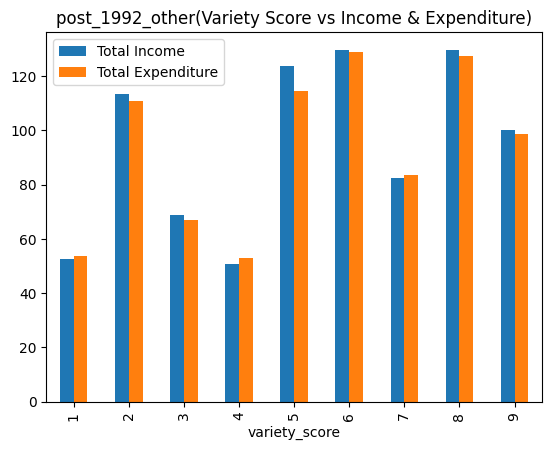

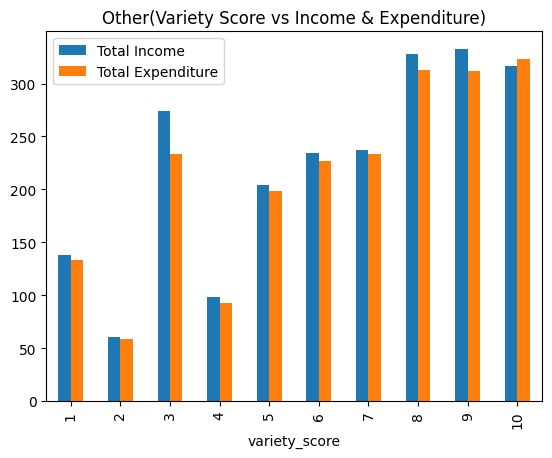

In [137]:
temp1.groupby("variety_score").mean().plot.bar(y = ["Total Income", "Total Expenditure"])
plt.title('post_1992_other(Variety Score vs Income & Expenditure)')
temp2.groupby("variety_score").mean().plot.bar(y = ["Total Income", "Total Expenditure"])
plt.title('Other(Variety Score vs Income & Expenditure)')

### New groups
1) Type of courses
2) Availability of accomodation
3) Region of campus
4) Size of the university(income)
5) Size of the university(no. of students)
6) Ranking

In [138]:
sheet = pd.read_excel('University Benchmarking Dashboard - Formatted.xlsx', 'More details', header = 0)
sheet.dropna(axis=1, how='all', inplace = True)
sheet.head(5)

Name of the University Courses_type              County      Region  \
0      The University of Oxford          mix         Oxfordshire  South East   
1   The University of Cambridge          mix      Cambridgeshire        East   
2     University College London          mix              London  South East   
3   The University of Edinburgh          mix            Scotland    Scotland   
4  The University of Manchester          mix  Greater Manchester  North West   

  Accomodation  
0          yes  
1          yes  
2          yes  
3          yes  
4          yes

In [139]:
sub_main["Courses_type"] = ""
sub_main["County"] = ""
sub_main["Region"] = ""
sub_main["Accomodation"] = ""

for i in range(len(sub_main.index)):
    for j in range(len(sheet.index)):
        if sub_main["University"][i] == sheet["Name of the University"][j]:
            sub_main["Courses_type"][i] = sheet["Courses_type"][j]
            sub_main["County"][i] = sheet["County"][j]
            sub_main["Region"][i] = sheet["Region"][j]
            sub_main["Accomodation"][i] = sheet["Accomodation"][j]

In [140]:
sub_main["Courses_type"].unique()

array(['mix', 'Business and Finance', 'Arts', 'Medical',
       'Arts and Sciences', 'Veterinary', 'Agriculture',
       'Arts and Business', 'Business and Health', 'Performing Arts',
       'STEM'], dtype=object)

In [141]:
sub_main["Region"].unique()

array(['South East', 'East', 'Scotland', 'North West',
       'Yorkshire and the Humber', 'West Midlands', 'South West',
       'East Midlands', 'Wales', 'North East', 'Northern Ireland'],
      dtype=object)

In [142]:
sub_main["Accomodation"].unique()

array(['yes', 'no', 'Limited'], dtype=object)

In [143]:
#sub_main = sub_main[(sub_main["Total Income"] != 0) & (sub_main["Total_students"] != 0)]
sub_main = sub_main[(sub_main["Total Income"] != 0)]
sub_main = sub_main[sub_main["University"] != "Heriot-Watt University"]
sub_main.reset_index(drop = True, inplace = True)

25.732
2924.682


<Axes: >

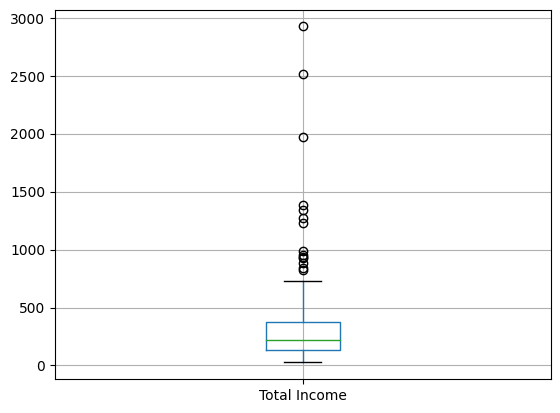

In [144]:
print(sub_main[sub_main["Academic Year"] == "2022/23"]["Total Income"].min())
print(sub_main[sub_main["Academic Year"] == "2022/23"]["Total Income"].max())

sub_main[sub_main["Academic Year"] == "2022/23"].boxplot(column = ["Total Income"])

270.0
151840.0


<Axes: >

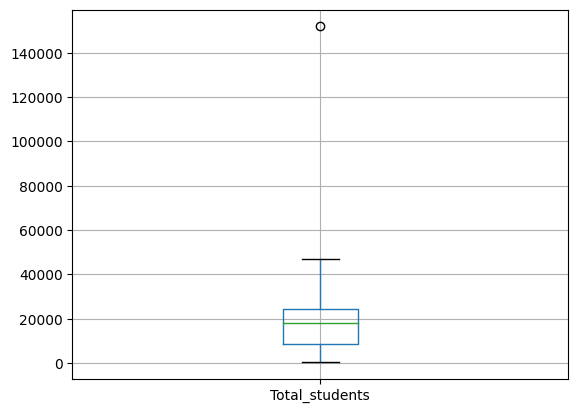

In [145]:
print(sub_main[sub_main["Academic Year"] == "2021/22"]["Total_students"].min())
print(sub_main[sub_main["Academic Year"] == "2021/22"]["Total_students"].max())

sub_main[sub_main["Academic Year"] == "2021/22"].boxplot(column = ["Total_students"])

In [146]:
sub_main[sub_main["University"] == "The Open University"]

University  Country Academic Year  Total Income  \
20   The Open University  England       2022/23       561.944   
161  The Open University  England       2021/22       553.956   
303  The Open University  England       2020/21       561.485   
445  The Open University  England       2019/20       474.144   
587  The Open University  England       2018/19       449.185   
729  The Open University  England       2017/18       424.057   
871  The Open University  England       2016/17       426.700   

     Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
20             535.109           26.835                               397.209   
161            777.504         -223.548                               423.092   
303            519.821           41.664                               393.198   
445            420.597           53.547                               330.659   
587            560.184         -110.999                               301.240   
729            449.872          -25.815                               270.951   
871            421.249            5.451                               261.212   

     Funding body grants  Research grants and contracts  Other income  \
20               123.382                         15.931        15.022   
161              113.832                         14.571        14.639   
303              104.509                         13.849        16.851   
445               96.602                         11.897        18.007   
587               94.951                         13.639        29.010   
729              101.084                         14.349        25.541   
871              114.188                         14.910        21.205   

     Investment income  Donations and endowments  Fees_UK  Fees_international  \
20               7.249                     3.151  369.908              12.753   
161            -17.939                     5.761  392.336              12.091   
303             29.996                     3.082  365.972              11.108   
445             13.749                     3.230  305.844               9.528   
587              7.094                     3.251  277.839               7.842   
729              8.659                     3.473  249.872               6.723   
871             12.985                     2.200  241.029               5.571   

     Fees_EU  Fees_research/other  Fees_non_credit_bearing_courses/other  \
20    12.156                1.940                                  0.452   
161   15.754                2.232                                  0.679   
303   14.028                1.383                                  0.707   
445   13.062                1.296                                  0.929   
587   12.883                1.344                                  1.332   
729   12.558                1.353                                  0.445   
871   12.696                1.480                                  0.436   

     Fees_FE_courses/other  Fees_total_other  Staff Costs  \
20                     0.0             2.392      320.890   
161                    0.0             2.911      581.870   
303                    0.0             2.090      354.314   
445                    0.0             2.225      256.472   
587                    0.0             2.676      411.876   
729                    0.0             1.798      291.198   
871                    0.0             1.916      285.216   

     Staff Costs / Total Expenditure  UK_students  EU_students  \
20                          0.599672          0.0          0.0   
161                         0.748382     151410.0        225.0   
303                         0.681608     151830.0        215.0   
445                         0.609781     129085.0        195.0   
587                         0.735251     122040.0        215.0   
729                         0.647291     117725.0        165.0   
871                         0.677072     121395.0 

In [147]:
len(sub_main[sub_main["Academic Year"] == "2022/23"])

141

In [148]:
sub_main[sub_main["Academic Year"] == "2022/23"].sort_values("Total Income")

University   Country Academic Year  \
140                           Leeds Arts University   England       2022/23   
134                 Royal Northern College of Music   England       2022/23   
136  Trinity Laban Conservatoire of Music and Dance   England       2022/23   
138                 Royal Conservatoire of Scotland  Scotland       2022/23   
139                      Courtauld Institute of Art   England       2022/23   
..                                              ...       ...           ...   
4                      The University of Manchester   England       2022/23   
3                       The University of Edinburgh  Scotland       2022/23   
2                         University College London   England       2022/23   
1                       The University of Cambridge   England       2022/23   
0                          The University of Oxford   England       2022/23   

     Total Income  Total Expenditure  Surplus/Deficit  \
140        25.732             24.121            1.611   
134        26.282             25.878            0.404   
136        26.787             29.024           -2.237   
138        27.650             27.759           -0.109   
139        29.475             29.536           -0.061   
..            ...                ...              ...   
4        1344.665           1237.876          106.789   
3        1384.728           1227.519          157.209   
2        1968.344           1752.046          216.298   
1        2518.255           2317.852          200.403   
0        2924.682           2581.179          343.503   

     Tuition fees and education contracts  Funding body grants  \
140                                21.755                3.398   
134                                13.093                6.691   
136                                15.030                6.312   
138                                11.657               13.923   
139                                 7.948                7.827   
..                                    ...                  ...   
4                                 659.945              184.180   
3                                 513.693              210.900   
2                                 911.977              236.720   
1                                 390.118              207.607   
0                                 504.244              229.247   

     Research grants and contracts  Other income  Investment income  \
140                          0.000         0.105              0.473   
134                          0.363         2.119              1.387   
136                          0.000         3.853              0.395   
138                          0.156         0.705              0.424   
139                          1.041         6.111              0.198   
..                             ...           ...                ...   
4                          271.088       193.458             17.430   
3                          339.535       222.200             43.300   
2                          526.713       235.901             28.079   
1                          569.503      1169.008             49.665   
0                          789.044      1034.740            180.515   

     Donations and endowments  Fees_UK  Fees_international  Fees_EU  \
140                     0.001   18.031               2.847    0.597   
134                     2.629    5.298               5.712    0.881   
136                     1.197    7.708               4.062    0.938   
138                     0.785    3.835               4.478    0.527   
139                     6.350    3.458               3.394    1.096   
..                        ...      ...                 ...      ...   
4                      18.564  220.231             400.997   16.715   
3                      55.100  113.482             355.010   17.873   
2                      28.954  180.082             647.592   15.212   
1                     132.354  132.651             

##### Income groups
1) more than 1500 mil
2) more than 1000 and less than 1500 mil
3) more than 750 and less than 1000 mil
4) more than 500 and less than 750 mil
5) more than 400 and less than 500 mil
6) more than 300 and less than 400 mil
7) more than 200 and less than 300 mil
8) more than 100 and less than 200 mil
9) less than 100 mil

In [149]:
sub_main_latest = sub_main[sub_main["Academic Year"] == "2021/22"]
sub_main_latest.reset_index(drop = True, inplace = True)

In [150]:
sub_main_latest["Income_group"] = ""

for i in range(len(sub_main_latest.index)):
    if sub_main_latest["Total Income"][i] > 1500:
        sub_main_latest["Income_group"][i] = "IG1(>1500)"
    elif sub_main_latest["Total Income"][i] < 1500 and sub_main_latest["Total Income"][i] > 1000:
        sub_main_latest["Income_group"][i] = "IG2(1000-1500)"
    elif sub_main_latest["Total Income"][i] < 1000 and sub_main_latest["Total Income"][i] > 750:
        sub_main_latest["Income_group"][i] = "IG3(750-1000)"
    elif sub_main_latest["Total Income"][i] < 750 and sub_main_latest["Total Income"][i] > 500:
        sub_main_latest["Income_group"][i] = "IG4(500-750)"
    elif sub_main_latest["Total Income"][i] < 500 and sub_main_latest["Total Income"][i] > 400:
        sub_main_latest["Income_group"][i] = "IG5(400-500)"
    elif sub_main_latest["Total Income"][i] < 400 and sub_main_latest["Total Income"][i] > 300:
        sub_main_latest["Income_group"][i] = "IG6(300-400)"
    elif sub_main_latest["Total Income"][i] < 300 and sub_main_latest["Total Income"][i] > 200:
        sub_main_latest["Income_group"][i] = "IG7(200-400)"
    elif sub_main_latest["Total Income"][i] < 200 and sub_main_latest["Total Income"][i] > 100:
        sub_main_latest["Income_group"][i] = "IG8(100-200)"
    elif sub_main_latest["Total Income"][i] < 100:
        sub_main_latest["Income_group"][i] = "IG9(<100)"

In [151]:
sub_main[sub_main["University"] != "The Open University"]["Total_students"].max()

46830.0

##### University size:
1) more than 50000
2) between 50000 and 40000
3) between 40000 and 30000
4) between 30000 and 20000
5) between 20000 and 15000
6) between 15000 and 10000
7) between 10000 and 5000
8) between 5000 and 1000
9) less than 1000

In [152]:
sub_main_latest["Uni_size"] = ""

for i in range(len(sub_main_latest.index)):
    if sub_main_latest["Total_students"][i] > 50000:
        sub_main_latest["Uni_size"][i] = "S1(>50k)"
    elif sub_main_latest["Total_students"][i] < 50000 and sub_main_latest["Total_students"][i] > 40000:
        sub_main_latest["Uni_size"][i] = "S2(40k-50k)"
    elif sub_main_latest["Total_students"][i] < 40000 and sub_main_latest["Total_students"][i] > 30000:
        sub_main_latest["Uni_size"][i] = "S3(30k-40k)"
    elif sub_main_latest["Total_students"][i] < 30000 and sub_main_latest["Total_students"][i] > 20000:
        sub_main_latest["Uni_size"][i] = "S4(20k-30k)"
    elif sub_main_latest["Total_students"][i] < 20000 and sub_main_latest["Total_students"][i] > 15000:
        sub_main_latest["Uni_size"][i] = "S5(15k-20k)"
    elif sub_main_latest["Total_students"][i] < 15000 and sub_main_latest["Total_students"][i] > 10000:
        sub_main_latest["Uni_size"][i] = "S6(10k-15k)"
    elif sub_main_latest["Total_students"][i] < 10000 and sub_main_latest["Total_students"][i] > 5000:
        sub_main_latest["Uni_size"][i] = "S7(5k-10k)"
    elif sub_main_latest["Total_students"][i] < 5000 and sub_main_latest["Total_students"][i] > 1000:
        sub_main_latest["Uni_size"][i] = "S8(1k-5k)"
    elif sub_main_latest["Total_students"][i] < 1000:
        sub_main_latest["Uni_size"][i] = "S9(<1k)"

In [153]:
sub_main_latest.head(2)

University  Country Academic Year  Total Income  \
0     The University of Oxford  England       2021/22      2775.240   
1  The University of Cambridge  England       2021/22      2218.748   

   Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
0           2897.326         -122.086                               466.833   
1           2301.047          -82.299                               376.232   

   Funding body grants  Research grants and contracts  Other income  \
0              206.056                        711.386      1154.162   
1              197.252                        551.823      1027.053   

   Investment income  Donations and endowments  Fees_UK  Fees_international  \
0            130.100                   106.703  132.833             196.528   
1             13.557                    52.831  132.726             168.617   

   Fees_EU  Fees_research/other  Fees_non_credit_bearing_courses/other  \
0   29.000               53.574                                 53.883   
1   31.744               26.497                                 16.648   

   Fees_FE_courses/other  Fees_total_other  Staff Costs  \
0                  1.015           108.472     1535.987   
1                  0.000            43.145     1305.173   

   Staff Costs / Total Expenditure  UK_students  EU_students  Non-EU_students  \
0                         0.530140      18030.0       2415.0           6845.0   
1                         0.567208      15405.0       2015.0           5190.0   

   Total_students    Association        Established Location       Funding  \
0         27290.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   
1         22610.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   

   Times Ranking 2023       UK_fps        EU_fps    Non-EU_fps Courses_type  \
0                 1.0  7367.332224  12008.281573  28711.176041          mix   
1                 3.0  8615.774099  15753.846154  32488.824663          mix   

           County      Region Accomodation Income_group     Uni_size  
0     Oxfordshire  South East          yes   IG1(>1500)  S4(20k-30k)  
1  Cambridgeshire        East          yes   IG1(>1500)  S4(20k-30k)

In [154]:
sub_main["Income_group"] = ""
sub_main["Uni_size"] = ""

for i in range(len(sub_main.index)):
    for j in range(len(sub_main_latest.index)):
        if sub_main["University"][i] == sub_main_latest["University"][j]:
            sub_main["Income_group"][i] = sub_main_latest["Income_group"][j]
            sub_main["Uni_size"][i] = sub_main_latest["Uni_size"][j]

In [155]:
sub_main["Income_group"].unique()

array(['IG1(>1500)', 'IG2(1000-1500)', 'IG3(750-1000)', 'IG4(500-750)',
       'IG5(400-500)', 'IG6(300-400)', 'IG7(200-400)', 'IG8(100-200)',
       'IG9(<100)'], dtype=object)

In [156]:
sub_main["Uni_size"].unique()

array(['S4(20k-30k)', 'S2(40k-50k)', 'S3(30k-40k)', 'S1(>50k)',
       'S6(10k-15k)', 'S5(15k-20k)', 'S8(1k-5k)', 'S7(5k-10k)', 'S9(<1k)'],
      dtype=object)

In [157]:
rank_df = sub_main[sub_main["Academic Year"] == "2022/23"][["University", "Times Ranking 2023"]]
rank_df.sort_values("Times Ranking 2023")

University  Times Ranking 2023
137                    Ravensbourne University London                 0.0
0                            The University of Oxford                 1.0
42                      The University of St. Andrews                 2.0
1                         The University of Cambridge                 3.0
23   London School of Economics and Political Science                 4.0
..                                                ...                 ...
132                            Royal Academy of Music                 NaN
134                   Royal Northern College of Music                 NaN
136    Trinity Laban Conservatoire of Music and Dance                 NaN
138                   Royal Conservatoire of Scotland                 NaN
139                        Courtauld Institute of Art                 NaN

[141 rows x 2 columns]

In [158]:
rank_df["Times Ranking 2023"].max()

132.0

##### Ranking group
1) top 5
2) between 5-10
3) between 10-20
4) between 20-30
5) between 30-40
6) between 40-50
7) between 50-75
8) between 75-100
9) more than 100
10) unranked

In [159]:
rank_df["Rank_group"] = ""

for i in range(len(rank_df.index)):
    if rank_df["Times Ranking 2023"][i] < 6 and rank_df["Times Ranking 2023"][i] > 0:
        rank_df["Rank_group"][i] = "R1"
    elif rank_df["Times Ranking 2023"][i] < 11 and rank_df["Times Ranking 2023"][i] > 5:
        rank_df["Rank_group"][i] = "R2"
    elif rank_df["Times Ranking 2023"][i] < 21 and rank_df["Times Ranking 2023"][i] > 10:
        rank_df["Rank_group"][i] = "R3"
    elif rank_df["Times Ranking 2023"][i] < 31 and rank_df["Times Ranking 2023"][i] > 20:
        rank_df["Rank_group"][i] = "R4"
    elif rank_df["Times Ranking 2023"][i] < 41 and rank_df["Times Ranking 2023"][i] > 30:
        rank_df["Rank_group"][i] = "R5"
    elif rank_df["Times Ranking 2023"][i] < 51 and rank_df["Times Ranking 2023"][i] > 40:
        rank_df["Rank_group"][i] = "R6"
    elif rank_df["Times Ranking 2023"][i] < 76 and rank_df["Times Ranking 2023"][i] > 50:
        rank_df["Rank_group"][i] = "R7"
    elif rank_df["Times Ranking 2023"][i] < 101 and rank_df["Times Ranking 2023"][i] > 75:
        rank_df["Rank_group"][i] = "R8"
    elif rank_df["Times Ranking 2023"][i] > 100:
        rank_df["Rank_group"][i] = "R9"
    else:
        rank_df["Rank_group"][i] = "Unranked"

In [160]:
rank_df

University  Times Ranking 2023  \
0                          The University of Oxford                 1.0   
1                       The University of Cambridge                 3.0   
2                         University College London                 7.0   
3                       The University of Edinburgh                10.0   
4                      The University of Manchester                24.0   
..                                              ...                 ...   
136  Trinity Laban Conservatoire of Music and Dance                 NaN   
137                  Ravensbourne University London                 0.0   
138                 Royal Conservatoire of Scotland                 NaN   
139                      Courtauld Institute of Art                 NaN   
140                           Leeds Arts University                71.0   

    Rank_group  
0           R1  
1           R1  
2           R2  
3           R2  
4           R4  
..         ...  
136   Unranked  
137   Unranked  
138   Unranked  
139   Unranked  
140         R7  

[141 rows x 3 columns]

In [161]:
sub_main["Rank_group"] = ""


for i in range(len(sub_main.index)):
    for j in range(len(rank_df.index)):
        if sub_main["University"][i] == rank_df["University"][j]:
            sub_main["Rank_group"][i] = rank_df["Rank_group"][j]

In [162]:
sub_main.head(2)

University  Country Academic Year  Total Income  \
0     The University of Oxford  England       2022/23      2924.682   
1  The University of Cambridge  England       2022/23      2518.255   

   Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
0           2581.179          343.503                               504.244   
1           2317.852          200.403                               390.118   

   Funding body grants  Research grants and contracts  Other income  \
0              229.247                        789.044      1034.740   
1              207.607                        569.503      1169.008   

   Investment income  Donations and endowments  Fees_UK  Fees_international  \
0            180.515                   186.892  144.971             199.563   
1             49.665                   132.354  132.651             182.201   

   Fees_EU  Fees_research/other  Fees_non_credit_bearing_courses/other  \
0   33.840               57.941                                 67.929   
1   27.905               25.745                                 21.616   

   Fees_FE_courses/other  Fees_total_other  Staff Costs  \
0                    0.0           125.870      1120.00   
1                    0.0            47.361      1020.64   

   Staff Costs / Total Expenditure  UK_students  EU_students  Non-EU_students  \
0                         0.433910          0.0          0.0              0.0   
1                         0.440339          0.0          0.0              0.0   

   Total_students    Association        Established Location       Funding  \
0             0.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   
1             0.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   

   Times Ranking 2023  UK_fps  EU_fps  Non-EU_fps Courses_type  \
0                 1.0     inf     inf         inf          mix   
1                 3.0     inf     inf         inf          mix   

           County      Region Accomodation Income_group     Uni_size  \
0     Oxfordshire  South East          yes   IG1(>1500)  S4(20k-30k)   
1  Cambridgeshire        East          yes   IG1(>1500)  S4(20k-30k)   

  Rank_group  
0         R1  
1         R1

In [163]:
sub_main[sub_main["Region"]=="Wales"]["County"].unique()

array(['Wales', 'Glamorgan'], dtype=object)

In [164]:
sub_main["Rank_group"].unique()

array(['R1', 'R2', 'R4', 'R3', 'R5', 'Unranked', 'R6', 'R7', 'R8', 'R9',
       ''], dtype=object)

In [165]:
for i in range(len(sub_main.index)):
    if sub_main["Rank_group"][i] == '':
        sub_main["Rank_group"][i] = "Unranked"
        
sub_main.replace(np.inf, 0, inplace = True)

In [166]:
sub_main.to_csv("Data/updated.csv")

### EDA

In [60]:
sub_main

University   Country Academic Year  \
0                          The University of Oxford   England       2022/23   
1                       The University of Cambridge   England       2022/23   
2                         University College London   England       2022/23   
3                       The University of Edinburgh  Scotland       2022/23   
4                      The University of Manchester   England       2022/23   
..                                              ...       ...           ...   
988  Trinity Laban Conservatoire of Music and Dance   England       2016/17   
989                  Ravensbourne University London   England       2016/17   
990                 Royal Conservatoire of Scotland  Scotland       2016/17   
991                      Courtauld Institute of Art   England       2016/17   
992                           Leeds Arts University   England       2016/17   

     Total Income  Total Expenditure  Surplus/Deficit  \
0        2924.682           2581.179          343.503   
1        2518.255           2317.852          200.403   
2        1968.344           1752.046          216.298   
3        1384.728           1227.519          157.209   
4        1344.665           1237.876          106.789   
..            ...                ...              ...   
988        25.400             23.741            1.659   
989        25.939             25.843            0.096   
990        22.726             22.039            0.687   
991        19.479             17.422            2.057   
992        16.808             14.185            2.623   

     Tuition fees and education contracts  Funding body grants  \
0                                 504.244              229.247   
1                                 390.118              207.607   
2                                 911.977              236.720   
3                                 513.693              210.900   
4                                 659.945              184.180   
..                                    ...                  ...   
988                                11.546                6.490   
989                                20.121                4.311   
990                                 8.897               11.669   
991                                 4.940                4.756   
992                                13.157                3.371   

     Research grants and contracts  Other income  Investment income  \
0                          789.044      1034.740            180.515   
1                          569.503      1169.008             49.665   
2                          526.713       235.901             28.079   
3                          339.535       222.200             43.300   
4                          271.088       193.458             17.430   
..                             ...           ...                ...   
988                          0.078         4.017              0.144   
989                          0.112         1.286              0.109   
990                          0.072         1.283              0.127   
991                          1.727         3.181              1.338   
992                          0.000         0.196              0.084   

     Donations and endowments  Fees_UK  Fees_international  Fees_EU  \
0                     186.892  144.971             199.563   33.840   
1                     132.354  132.651             182.201   27.905   
2                      28.954  180.082             647.592   15.212   
3                      55.100  113.482             355.010   17.873   
4                      18.564  220.231             400.997   16.715   
..                        ...      ...                 ...      ...   
988                     3.125    6.237               1.477    1.295   
989                     0.000   16.524               1.421    1.800   
990                     0.678    3.315               2.738    0.589   
991                     3.537    2.303             

In [61]:
percent_cols = ["Total Income", "Tuition fees and education contracts", "Funding body grants", "Research grants and contracts",
                "Other income", "Investment income", "Donations and endowments", "Total Expenditure", "Staff Costs",
                "Surplus/Deficit", "Staff Costs / Total Expenditure", "Fees_UK", "Fees_international", "Fees_EU",
                "Fees_total_other", "Total_students", "UK_students", "EU_students", "Non-EU_students"]

In [68]:
grouped = sub_main.groupby(["Academic Year"]).sum()

In [69]:
grouped

Total Income  Total Expenditure  Surplus/Deficit  \
Academic Year                                                     
2016/17           34518.936          33377.187         1141.749   
2017/18           36916.596          35930.135          986.461   
2018/19           39064.786          42548.784        -3483.998   
2019/20           39405.711          35993.125         3412.586   
2020/21           40910.272          39410.552         1499.720   
2021/22           44753.927          48927.173        -4173.246   
2022/23           48189.538          45349.464         2840.074   

               Tuition fees and education contracts  Funding body grants  \
Academic Year                                                              
2016/17                                   16941.024             4927.520   
2017/18                                   18000.344             4932.045   
2018/19                                   18934.885             5160.106   
2019/20                                   20128.679             5312.895   
2020/21                                   21573.816             5798.268   
2021/22                                   23522.368             5664.444   
2022/23                                   25062.774             6060.266   

               Research grants and contracts  Other income  Investment income  \
Academic Year                                                                   
2016/17                             5849.249      5982.315            245.422   
2017/18                             6158.112      7011.697            243.542   
2018/19                             6515.172      7382.270            379.796   
2019/20                             6234.719      6699.486            350.144   
2020/21                             6467.207      6197.576            303.522   
2021/22                             6964.126      7655.208            327.652   
2022/23                             7308.357      8077.246            873.404   

               Donations and endowments    Fees_UK  Fees_international  \
Academic Year                                                            
2016/17                         573.406  10613.770            4439.711   
2017/18                         570.856  11045.896            4935.552   
2018/19                         692.557  11298.291            5503.330   
2019/20                         679.788  11625.292            6428.396   
2020/21                         569.883  12568.783            6902.138   
2021/22                         620.129  12844.393            8676.444   
2022/23                         807.491  12739.011           10257.625   

                Fees_EU  Fees_research/other  \
Academic Year                                  
2016/17         979.927              362.869   
2017/18        1041.407              388.086   
2018/19        1084.819              424.754   
2019/20        1129.529              401.978   
2020/21        1220.349              420.339   
2021/22         986.254              434.539   
2022/23         816.549              447.316   

               Fees_non_credit_bearing_courses/other  Fees_FE_courses/other  \
Academic Year                                                                 
2016/17                                      509.290                 35.457   
2017/18                                      551.001                 38.402   
2018/19                                      581.376                 42.315   
2019/20                                      501.033                 42.451   
2020/21                                      425.840                 36.367   
2021/22                                      533.923                 46.815   
2022/23                                      602.189                 43.123   

               Fees_total_other  Staff Costs  Staff Costs / Total Expenditure  \
Academic Year                                                                   
2016/17               

In [81]:
for i in percent_cols:
    value_list = []
    for each in range(len(grouped[i])):
        if grouped[i][each] == 0 or grouped[i][each] < 0:
            pass
        else:
            value_list.append(grouped[i][each])
    base_value = min(value_list)
    
    grouped[f"{i}%"] = 0
    for j in range(len(grouped[f"{i}%"])):
        grouped[f"{i}%"][j] = ((grouped[i][j] - base_value)/base_value) * 100

In [82]:
grouped

Total Income  Total Expenditure  Surplus/Deficit  \
Academic Year                                                     
2016/17           34518.936          33377.187         1141.749   
2017/18           36916.596          35930.135          986.461   
2018/19           39064.786          42548.784        -3483.998   
2019/20           39405.711          35993.125         3412.586   
2020/21           40910.272          39410.552         1499.720   
2021/22           44753.927          48927.173        -4173.246   
2022/23           48189.538          45349.464         2840.074   

               Tuition fees and education contracts  Funding body grants  \
Academic Year                                                              
2016/17                                   16941.024             4927.520   
2017/18                                   18000.344             4932.045   
2018/19                                   18934.885             5160.106   
2019/20                                   20128.679             5312.895   
2020/21                                   21573.816             5798.268   
2021/22                                   23522.368             5664.444   
2022/23                                   25062.774             6060.266   

               Research grants and contracts  Other income  Investment income  \
Academic Year                                                                   
2016/17                             5849.249      5982.315            245.422   
2017/18                             6158.112      7011.697            243.542   
2018/19                             6515.172      7382.270            379.796   
2019/20                             6234.719      6699.486            350.144   
2020/21                             6467.207      6197.576            303.522   
2021/22                             6964.126      7655.208            327.652   
2022/23                             7308.357      8077.246            873.404   

               Donations and endowments    Fees_UK  Fees_international  \
Academic Year                                                            
2016/17                         573.406  10613.770            4439.711   
2017/18                         570.856  11045.896            4935.552   
2018/19                         692.557  11298.291            5503.330   
2019/20                         679.788  11625.292            6428.396   
2020/21                         569.883  12568.783            6902.138   
2021/22                         620.129  12844.393            8676.444   
2022/23                         807.491  12739.011           10257.625   

                Fees_EU  Fees_research/other  \
Academic Year                                  
2016/17         979.927              362.869   
2017/18        1041.407              388.086   
2018/19        1084.819              424.754   
2019/20        1129.529              401.978   
2020/21        1220.349              420.339   
2021/22         986.254              434.539   
2022/23         816.549              447.316   

               Fees_non_credit_bearing_courses/other  Fees_FE_courses/other  \
Academic Year                                                                 
2016/17                                      509.290                 35.457   
2017/18                                      551.001                 38.402   
2018/19                                      581.376                 42.315   
2019/20                                      501.033                 42.451   
2020/21                                      425.840                 36.367   
2021/22                                      533.923                 46.815   
2022/23                                      602.189                 43.123   

               Fees_total_other  Staff Costs  Staff Costs / Total Expenditure  \
Academic Year                                                                   
2016/17               

In [66]:
len(sub_main["Total Income"])

993

## EDA

In [56]:
asso_ = sub_main.groupby(["Academic Year", "Association"]).sum()

In [57]:
cat = ["Other", "Post 1992 - other", "Post 1992 with central institution roots", "Post 1992 with polytechnic roots",
       "Russell Group"]

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

In [58]:
asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

Total Income  \
Academic Year Association                                              
2016/17       Other                                         8766.698   
              Post 1992 - other                             2156.917   
              Post 1992 with central institution roots       479.012   
              Post 1992 with polytechnic roots              6085.161   
              Russell Group                                17031.148   
2017/18       Other                                         9250.419   
              Post 1992 - other                             2220.131   
              Post 1992 with central institution roots       478.354   
              Post 1992 with polytechnic roots              6247.110   
              Russell Group                                18720.582   
2018/19       Other                                         9663.439   
              Post 1992 - other                             2361.230   
              Post 1992 with central institution roots       493.682   
              Post 1992 with polytechnic roots              6465.676   
              Russell Group                                20080.759   
2019/20       Other                                         9608.406   
              Post 1992 - other                             2409.405   
              Post 1992 with central institution roots       503.038   
              Post 1992 with polytechnic roots              6668.977   
              Russell Group                                20215.885   
2020/21       Other                                         9885.642   
              Post 1992 - other                             2633.949   
              Post 1992 with central institution roots       534.496   
              Post 1992 with polytechnic roots              7067.080   
              Russell Group                                20789.105   
2021/22       Other                                        10661.854   
              Post 1992 - other                             2818.537   
              Post 1992 with central institution roots       609.368   
              Post 1992 with polytechnic roots              7561.100   
              Russell Group                                23103.068   
2022/23       Other                                        11416.684   
              Post 1992 - other                             3157.326   
              Post 1992 with central institution roots       518.486   
              Post 1992 with polytechnic roots              8210.675   
              Russell Group                                24886.367   

                                                        Total Expenditure  \
Academic Year Association                                                   
2016/17       Other                                              8538.417   
              Post 1992 - other                                  2088.713   
              Post 1992 with central institution roots            491.415   
              Post 1992 with polytechnic roots                   5954.369   
              Russell Group                                     16304.273   
2017/18       Other                                              9048.581   
              Post 1992 - other                                  2180.618   
              Post 1992 with central institution roots            506.329   
              Post 1992 with polytechnic roots                   6183.927   
              Russell Group                                     18010.680   
2018/19       Other                                             10964.098   
              Post 1992 - other                                  2374.601   
              Post 1992 with central institution roots            527.492   
              Post 1992 with polytechnic roots                   6464.112   
              Russell Group                                     22218.481   
2019/20       Other                                              8676.688   
     

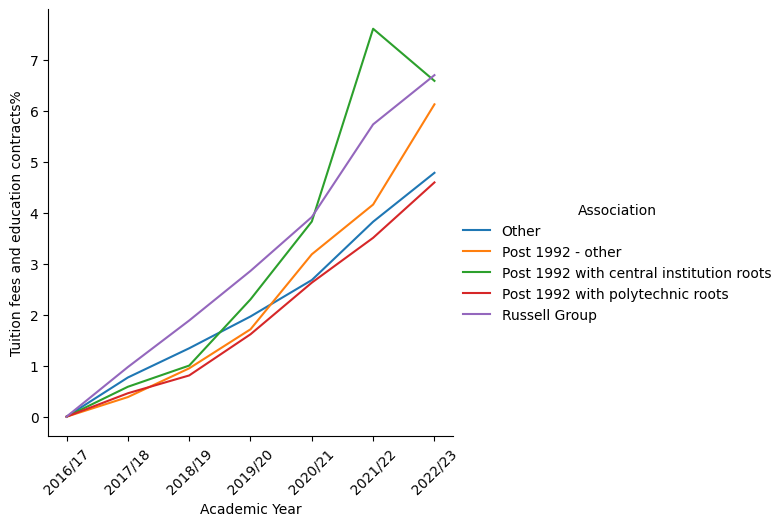

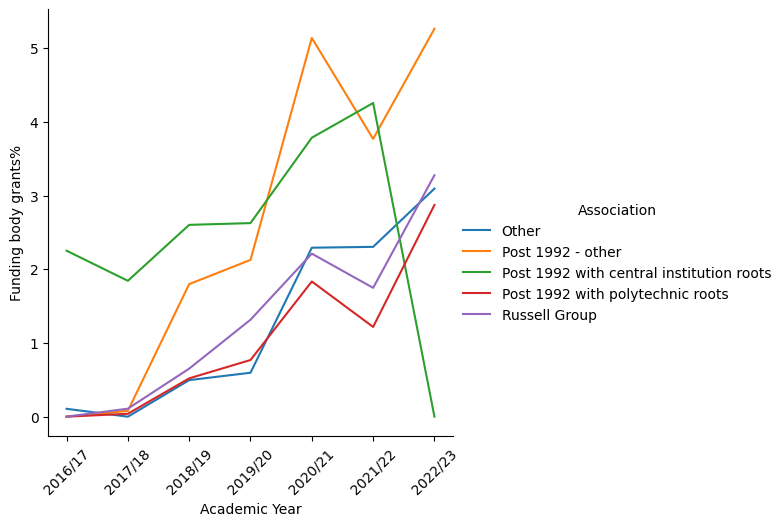

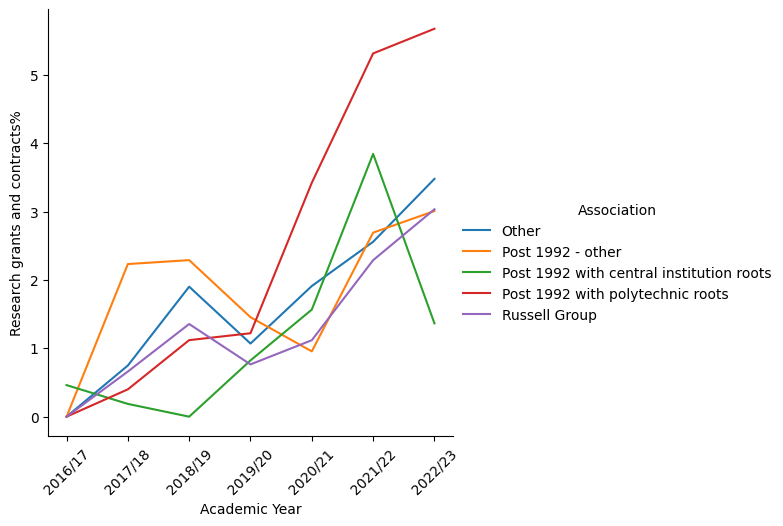

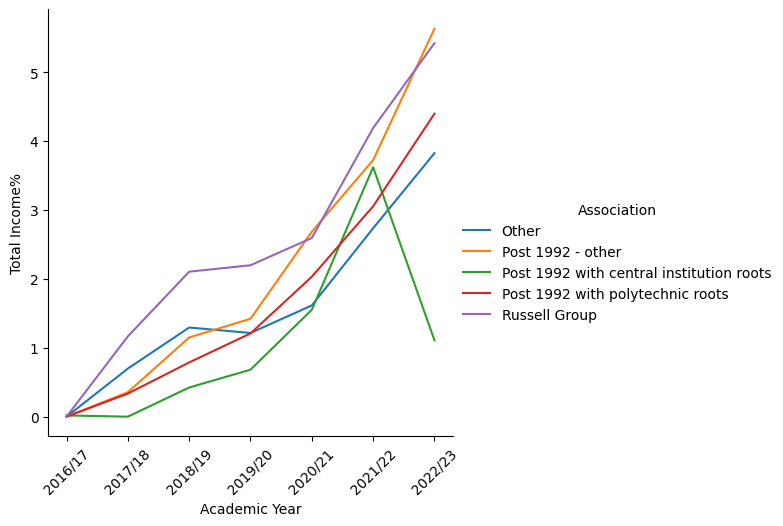

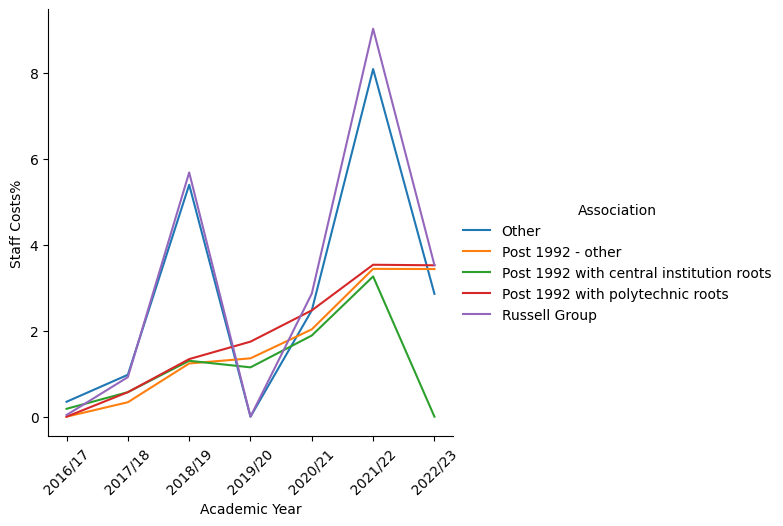

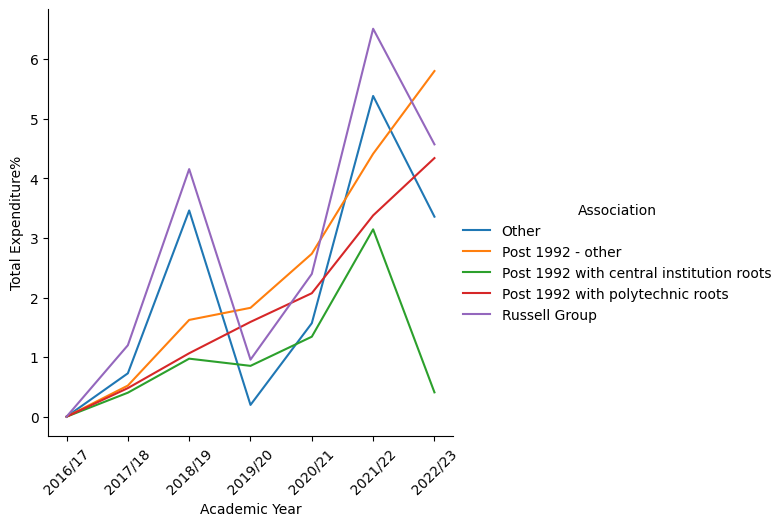

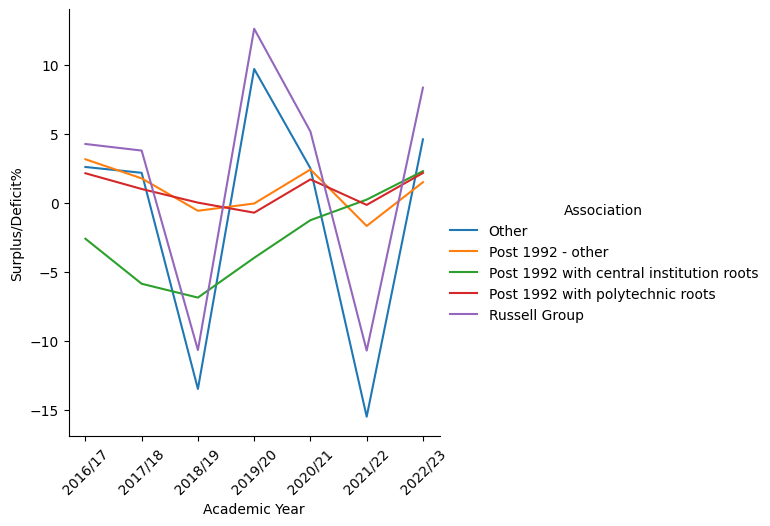

In [59]:
cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Association")

    plt.tick_params(axis = 'x', rotation = 45)

#### Diving in Russell Group

In [60]:
pl_russell = sub_main[sub_main["Association"] == "Russell Group"]
pl_russell.reset_index(drop = True, inplace = True)
pl_russell.head()

University   Country Academic Year  Total Income  \
0      The University of Oxford   England       2022/23      2924.682   
1   The University of Cambridge   England       2022/23      2518.255   
2     University College London   England       2022/23      1968.344   
3   The University of Edinburgh  Scotland       2022/23      1384.728   
4  The University of Manchester   England       2022/23      1344.665   

   Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
0           2581.179          343.503                               504.244   
1           2317.852          200.403                               390.118   
2           1752.046          216.298                               911.977   
3           1227.519          157.209                               513.693   
4           1237.876          106.789                               659.945   

   Funding body grants  Research grants and contracts   Staff Costs  \
0              229.247                        789.044  1.120000e+09   
1              207.607                        569.503  1.020640e+09   
2              236.720                        526.713  9.172050e+08   
3              210.900                        339.535  6.530010e+08   
4              184.180                        271.088  6.233110e+08   

   Other income  Investment income  Donations and endowments  Fees_UK  \
0      1034.740            180.515                   186.892  144.971   
1      1169.008             49.665                   132.354  132.651   
2       235.901             28.079                    28.954  180.082   
3       222.200             43.300                    55.100  113.482   
4       193.458             17.430                    18.564  220.231   

   Fees_international  Fees_EU  Fees_research/other  \
0             199.563   33.840               57.941   
1             182.201   27.905               25.745   
2             647.592   15.212               37.501   
3             355.010   17.873               21.715   
4             400.997   16.715                0.056   

   Fees_non_credit_bearing_courses/other  Fees_FE_courses/other  \
0                                 67.929                    0.0   
1                                 21.616                    0.0   
2                                 31.590                    0.0   
3                                  5.613                    0.0   
4                                 21.946                    0.0   

   Fees_total_other  UK_students  EU_students  Non-EU_students  \
0           125.870          0.0          0.0              0.0   
1            47.361          0.0          0.0              0.0   
2            69.091          0.0          0.0              0.0   
3            27.328          0.0          0.0              0.0   
4            22.002          0.0          0.0              0.0   

   Total_students    Association           Established Location  \
0             0.0  Russell Group     Ancient(pre 1860)    Other   
1             0.0  Russell Group     Ancient(pre 1860)    Other   
2             0.0  Russell Group                 Other   London   
3             0.0  Russell Group     Ancient(pre 1860)    Other   
4             0.0  Russell Group  Red Brick(1860-1960)    Other   

             Funding  Times Ranking 2023  UK_fps  EU_fps  Non-EU_fps  \
0       Public Bonds                 1.0     0.0     0.0         0.0   
1       Public Bonds                 3.0     0.0     0.0         0.0   
2       Public Bonds                 7.0     0.0     0.0         0.0   
3  Private Placement                10.0     0.0     0.0         0.0   
4       Public Bonds                24.0     0.0     0.0         0.0   

  Courses_type              County      Region Accomodation    Income_group  \
0          mix         Oxfordshire  South East          yes      IG1(>1500)   
1          mix      Cambridgeshire        East          yes      IG1(>1500)   
2          mix              London  S

In [61]:
group1 = pl_russell[(pl_russell["Total Income"] > 2000) &
                    (pl_russell["Academic Year"] == "2022/23")]["University"].unique()
group2 = pl_russell[(pl_russell["Total Income"] < 2000) &
                    (pl_russell["Total Income"] > 1000) &
                    (pl_russell["Academic Year"] == "2022/23")]["University"].unique()
group3 = pl_russell[(pl_russell["Total Income"] < 1000) &
                    (pl_russell["Academic Year"] == "2022/23")]["University"].unique()

In [62]:
pl_russell["Income Group"] = "Other"
    
for i in range(len(pl_russell.index)):
    if pl_russell["University"][i] in group1:
        pl_russell["Income Group"][i] = "group1"
    elif pl_russell["University"][i] in group2:
        pl_russell["Income Group"][i] = "group2"
    else:
        pl_russell["Income Group"][i] = "group3"

In [63]:
pl_russell["Total Income%"] = 0

for i in range(len(pl_russell.index)):
    if pl_russell["Income Group"][i] == "group1":
        value = min(pl_russell[pl_russell["Income Group"] == "group1"]["Total Income"])
        pl_russell["Total Income%"][i] = 100 * (pl_russell["Total Income"][i] - value) / pl_russell["Total Income"][i]

    elif pl_russell["Income Group"][i] == "group2":
        value = min(pl_russell[pl_russell["Income Group"] == "group2"]["Total Income"])
        pl_russell["Total Income%"][i] = 100 * (pl_russell["Total Income"][i] - value) / pl_russell["Total Income"][i]
    
    else:
        value = min(pl_russell[pl_russell["Income Group"] == "group3"]["Total Income"])
        pl_russell["Total Income%"][i] = 100 * (pl_russell["Total Income"][i] - value) / pl_russell["Total Income"][i]
        
pl_russell["Total Expenditure%"] = 0

for i in range(len(pl_russell.index)):
    if pl_russell["Income Group"][i] == "group1":
        value = min(pl_russell[pl_russell["Income Group"] == "group1"]["Total Expenditure"])
        pl_russell["Total Expenditure%"][i] = 100 * (pl_russell["Total Expenditure"][i] - value) / pl_russell["Total Expenditure"][i]

    elif pl_russell["Income Group"][i] == "group2":
        value = min(pl_russell[pl_russell["Income Group"] == "group2"]["Total Expenditure"])
        pl_russell["Total Expenditure%"][i] = 100 * (pl_russell["Total Expenditure"][i] - value) / pl_russell["Total Expenditure"][i]
    
    else:
        value = min(pl_russell[pl_russell["Income Group"] == "group3"]["Total Expenditure"])
        pl_russell["Total Expenditure%"][i] = 100 * (pl_russell["Total Expenditure"][i] - value) / pl_russell["Total Expenditure"][i]
        
pl_russell["Profit/Loss%"] = 0

for i in range(len(pl_russell.index)):
    value = pl_russell["Total Income"][i] - pl_russell["Total Expenditure"][i]
    pl_russell["Profit/Loss%"][i] = 100 * (value / pl_russell["Total Income"][i])

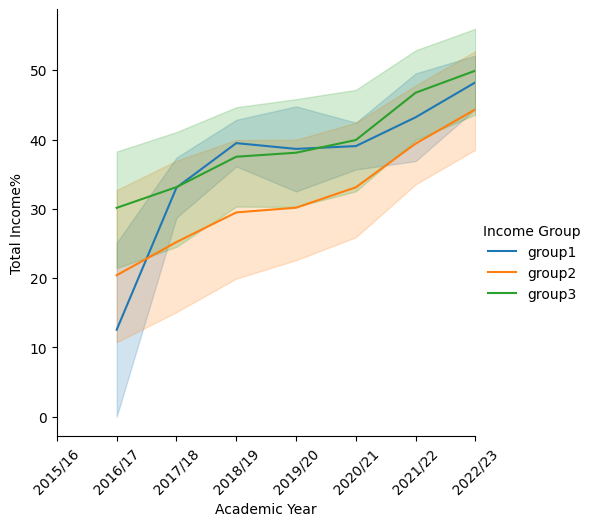

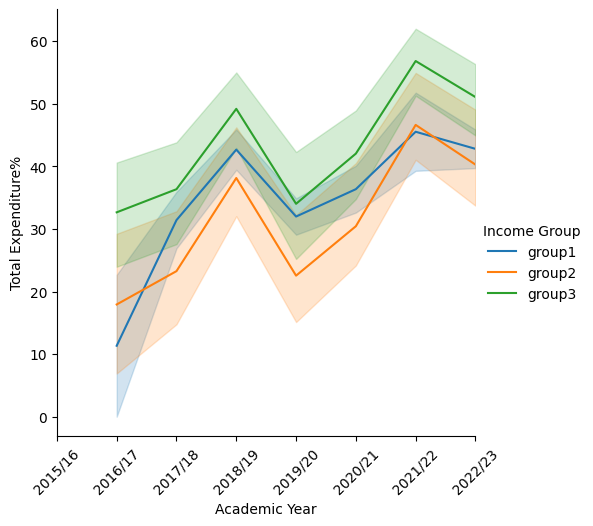

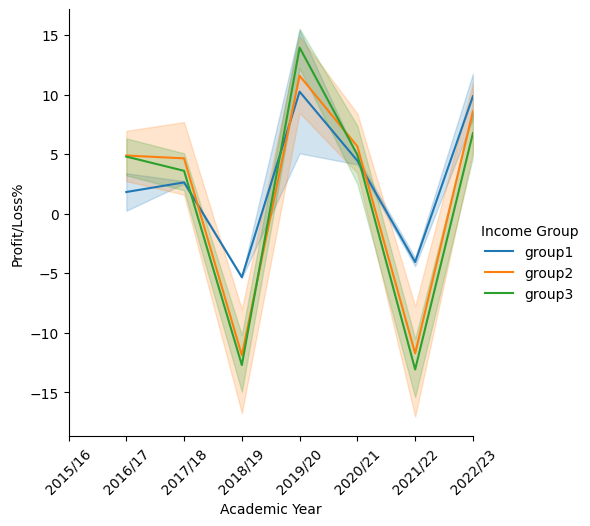

In [64]:
sns.relplot(data = pl_russell,
            kind = "line",
            x = "Academic Year",
            y = "Total Income%",
            hue = "Income Group")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

sns.relplot(data = pl_russell,
            kind = "line",
            x = "Academic Year",
            y = "Total Expenditure%",
            hue = "Income Group")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

sns.relplot(data = pl_russell,
            kind = "line",
            x = "Academic Year",
            y = "Profit/Loss%",
            hue = "Income Group")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

#### Analysis according to year of establishment

In [65]:
pl1 = sub_main.copy()

pl1["Surplus/Deficit%"] = (pl1["Surplus/Deficit"]/pl1["Total Income"]) * 100
pl1

University   Country Academic Year  \
0                          The University of Oxford   England       2022/23   
1                       The University of Cambridge   England       2022/23   
2                         University College London   England       2022/23   
3                       The University of Edinburgh  Scotland       2022/23   
4                      The University of Manchester   England       2022/23   
..                                              ...       ...           ...   
988  Trinity Laban Conservatoire of Music and Dance   England       2016/17   
989                  Ravensbourne University London   England       2016/17   
990                 Royal Conservatoire of Scotland  Scotland       2016/17   
991                      Courtauld Institute of Art   England       2016/17   
992                           Leeds Arts University   England       2016/17   

     Total Income  Total Expenditure  Surplus/Deficit  \
0        2924.682           2581.179          343.503   
1        2518.255           2317.852          200.403   
2        1968.344           1752.046          216.298   
3        1384.728           1227.519          157.209   
4        1344.665           1237.876          106.789   
..            ...                ...              ...   
988        25.400             23.741            1.659   
989        25.939             25.843            0.096   
990        22.726             22.039            0.687   
991        19.479             17.422            2.057   
992        16.808             14.185            2.623   

     Tuition fees and education contracts  Funding body grants  \
0                                 504.244              229.247   
1                                 390.118              207.607   
2                                 911.977              236.720   
3                                 513.693              210.900   
4                                 659.945              184.180   
..                                    ...                  ...   
988                                11.546                6.490   
989                                20.121                4.311   
990                                 8.897               11.669   
991                                 4.940                4.756   
992                                13.157                3.371   

     Research grants and contracts   Staff Costs  Other income  \
0                          789.044  1.120000e+09      1034.740   
1                          569.503  1.020640e+09      1169.008   
2                          526.713  9.172050e+08       235.901   
3                          339.535  6.530010e+08       222.200   
4                          271.088  6.233110e+08       193.458   
..                             ...           ...           ...   
988                          0.078  1.376400e+07         4.017   
989                          0.112  1.300700e+07         1.286   
990                          0.072  1.616400e+07         1.283   
991                          1.727  8.296000e+06         3.181   
992                          0.000  9.101000e+06         0.196   

     Investment income  Donations and endowments  Fees_UK  Fees_international  \
0              180.515                   186.892  144.971             199.563   
1               49.665                   132.354  132.651             182.201   
2               28.079                    28.954  180.082             647.592   
3               43.300                    55.100  113.482             355.010   
4               17.430                    18.564  220.231             400.997   
..                 ...                       ...      ...                 ...   
988              0.144                     3.125    6.237               1.477   
989              0.109                     0.000   16.524               1.421   
990              0.127                     0.678    3.315               2.738   
991        

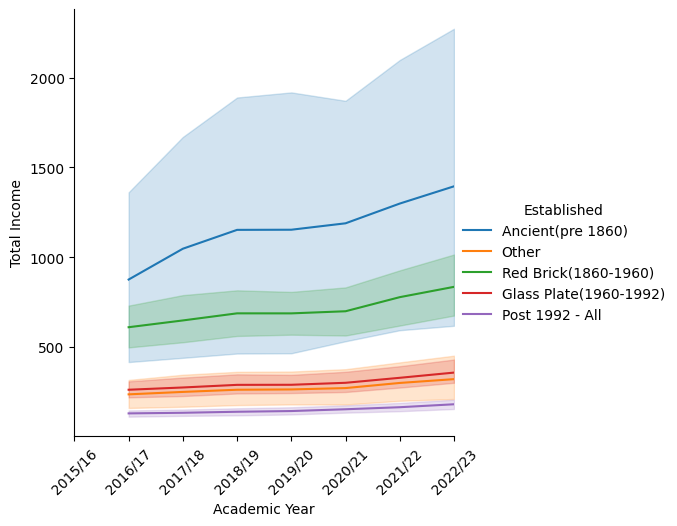

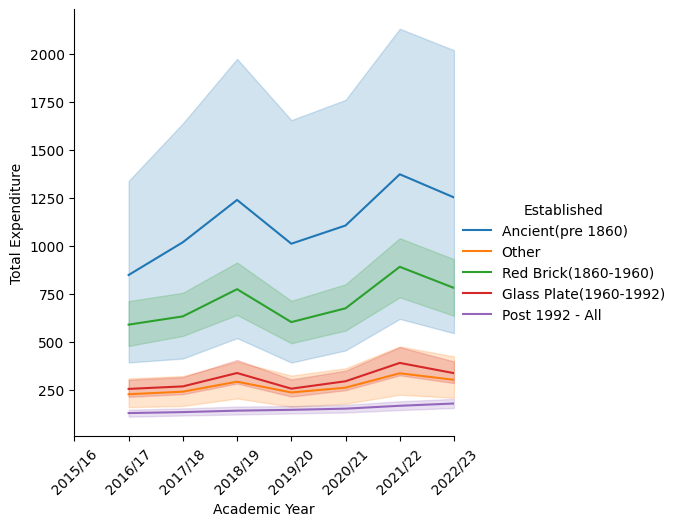

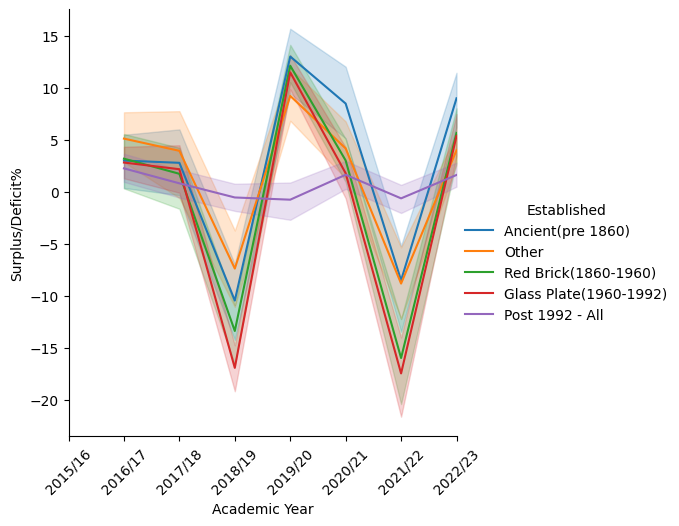

In [66]:
sns.relplot(data = pl1,
            kind = "line",
            x = "Academic Year",
            y = "Total Income",
            hue = "Established")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

sns.relplot(data = pl1,
            kind = "line",
            x = "Academic Year",
            y = "Total Expenditure",
            hue = "Established")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

sns.relplot(data = pl1,
            kind = "line",
            x = "Academic Year",
            y = "Surplus/Deficit%",
            hue = "Established")
plt.xlim("2015/16", "2022/23")
plt.tick_params(axis = 'x', rotation = 45)

#### According to course type

In [67]:
sub_main["Courses_type"].unique()

array(['mix', 'Business and Finance', 'Arts', 'Medical',
       'Arts and Sciences', 'Veterinary', 'Agriculture',
       'Arts and Business', 'Business and Health', 'Performing Arts'],
      dtype=object)

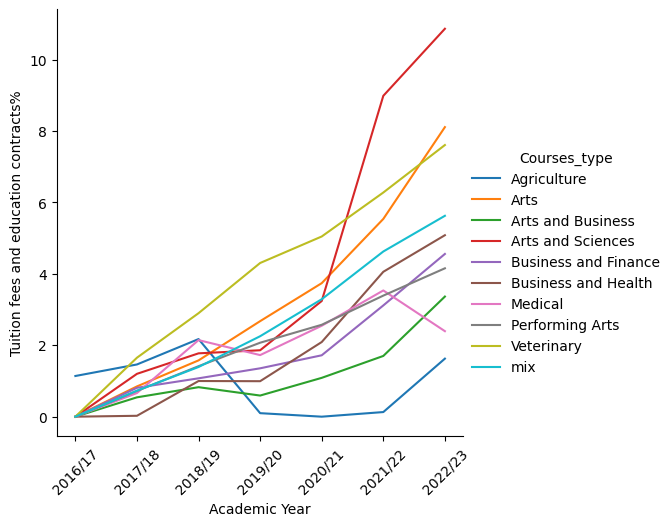

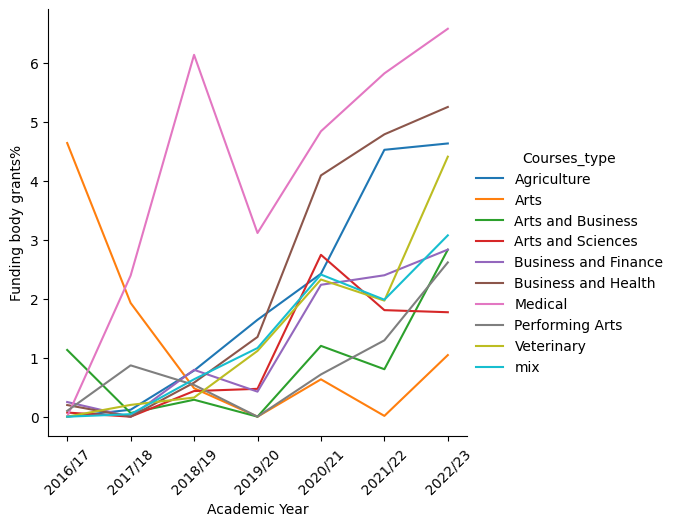

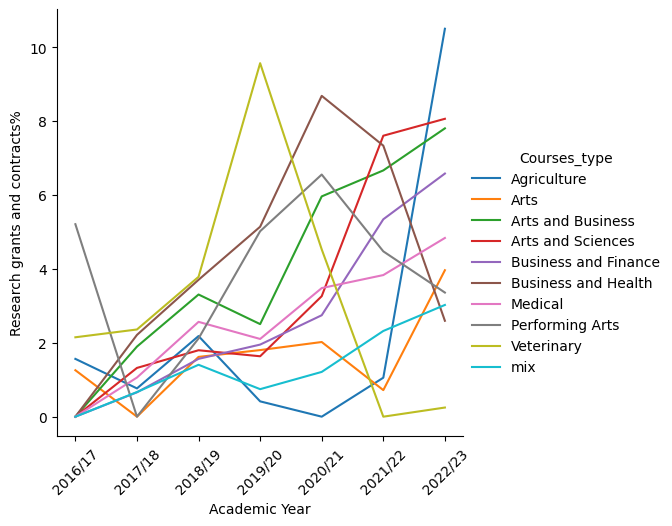

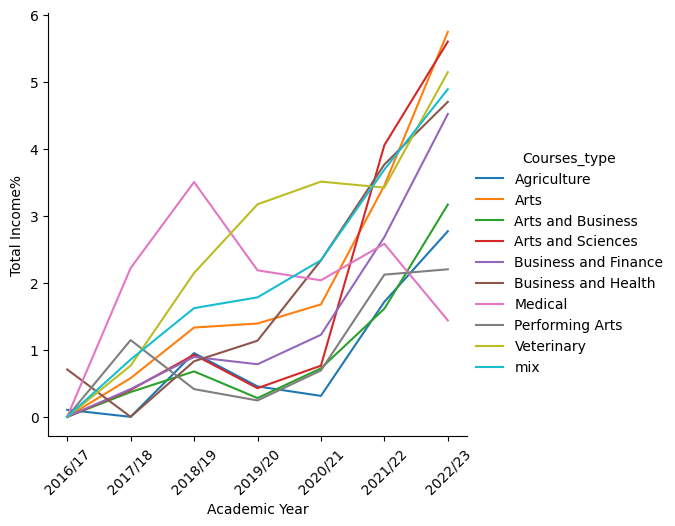

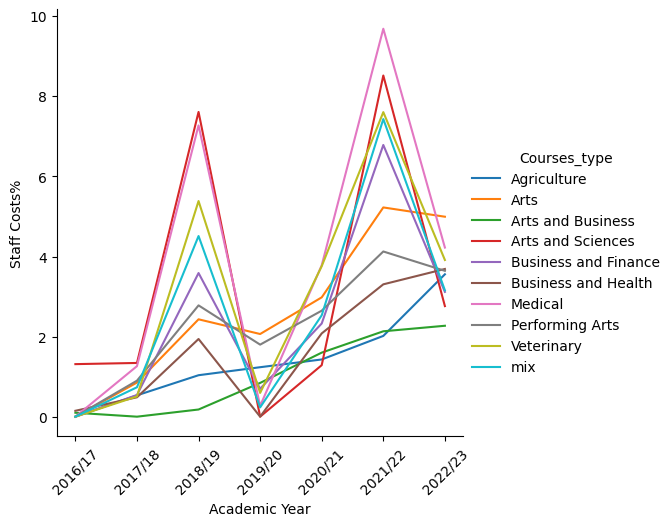

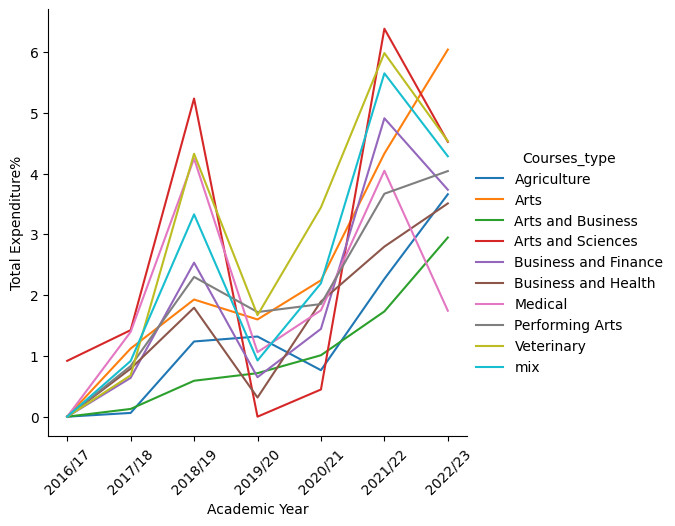

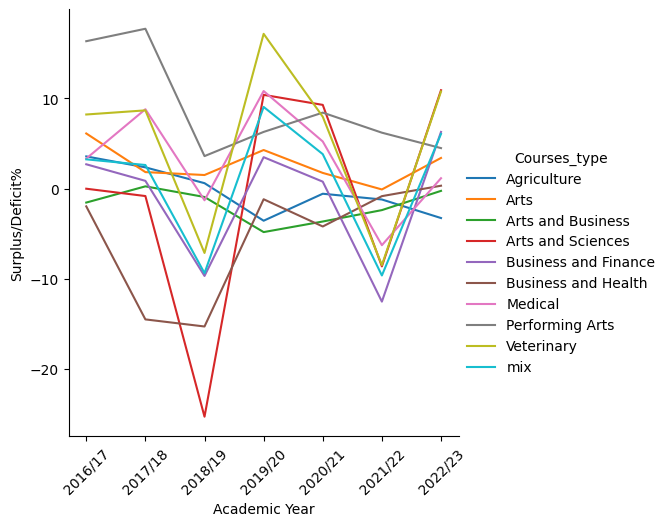

In [68]:
asso_ = sub_main.groupby(["Academic Year", "Courses_type"]).sum()

cat = ['mix', 'Business and Finance', 'Arts', 'Medical',
       'Arts and Sciences', 'Veterinary', 'Agriculture',
       'Arts and Business', 'Business and Health', 'Performing Arts']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Courses_type")

    plt.tick_params(axis = 'x', rotation = 45)

#### According to county/region

In [69]:
sub_main["Region"].unique()

array(['South East', 'East', 'Scotland', 'North West',
       'Yorkshire and the Humber', 'West Midlands', 'South West',
       'East Midlands', 'Wales', 'North East', 'Northern Ireland'],
      dtype=object)

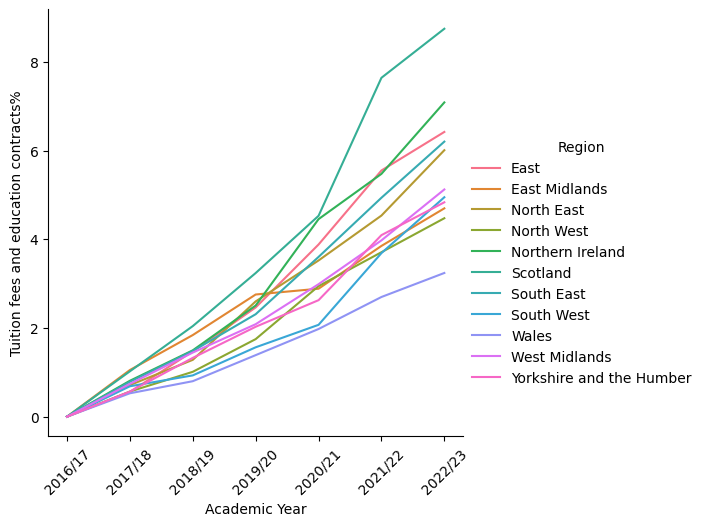

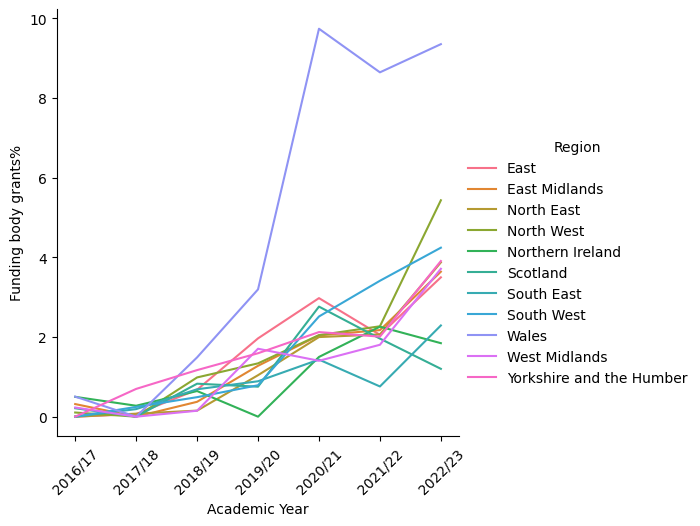

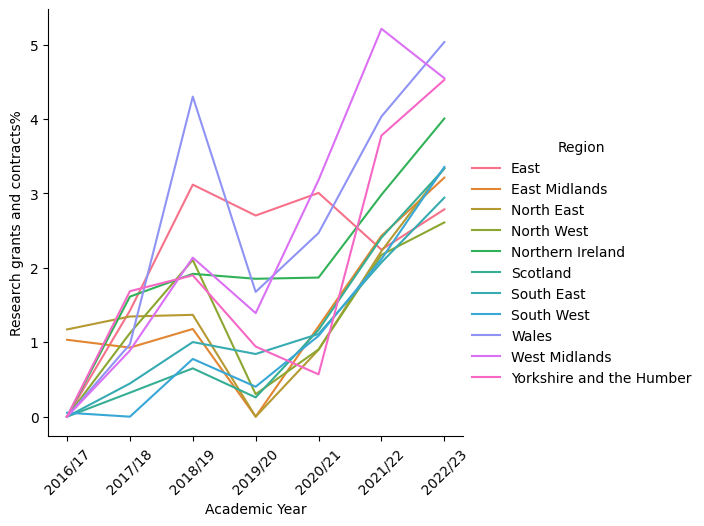

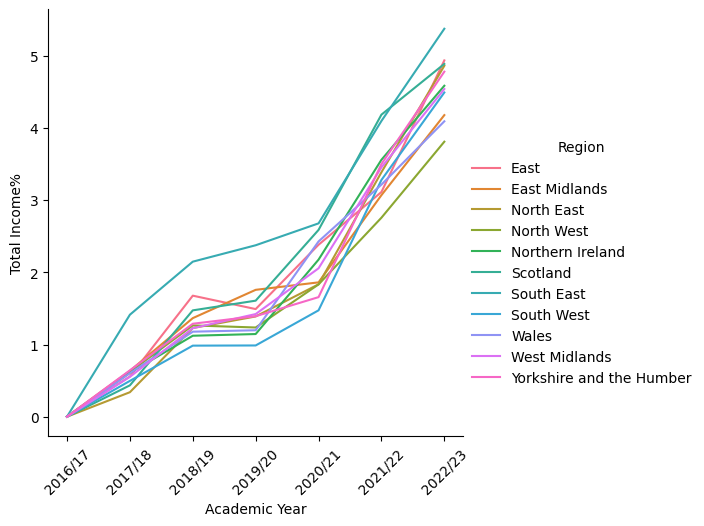

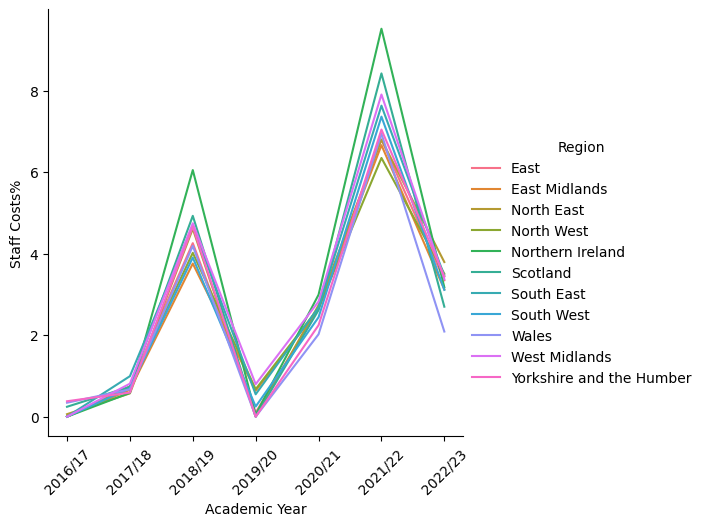

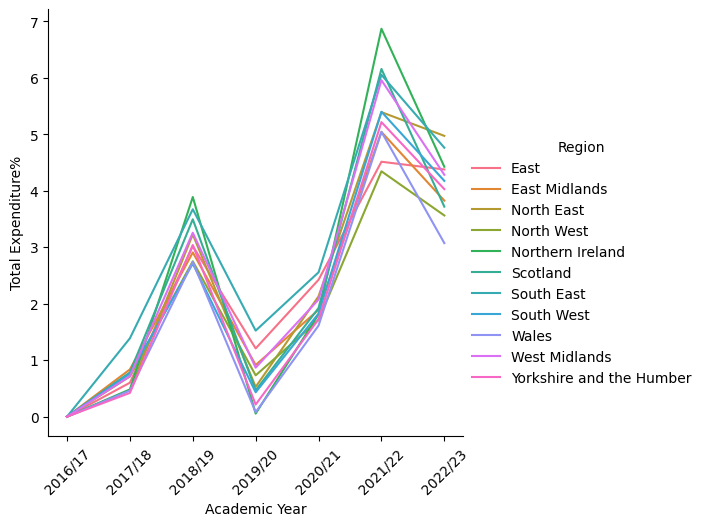

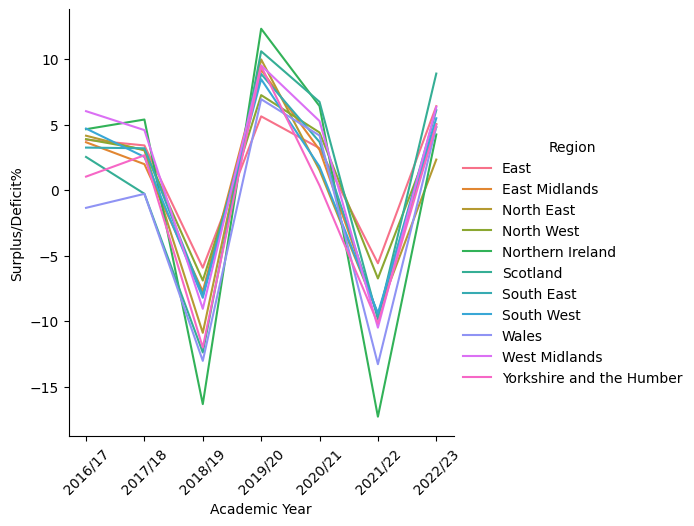

In [70]:
asso_ = sub_main.groupby(["Academic Year", "Region"]).sum()

cat = ['South East', 'East', 'Scotland', 'North West',
       'Yorkshire and the Humber', 'West Midlands', 'South West',
       'East Midlands', 'Wales', 'North East', 'Northern Ireland']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Region")

    plt.tick_params(axis = 'x', rotation = 45)

#### According to accomodation

In [71]:
sub_main["Accomodation"].unique()

array(['yes', 'no', 'Limited'], dtype=object)

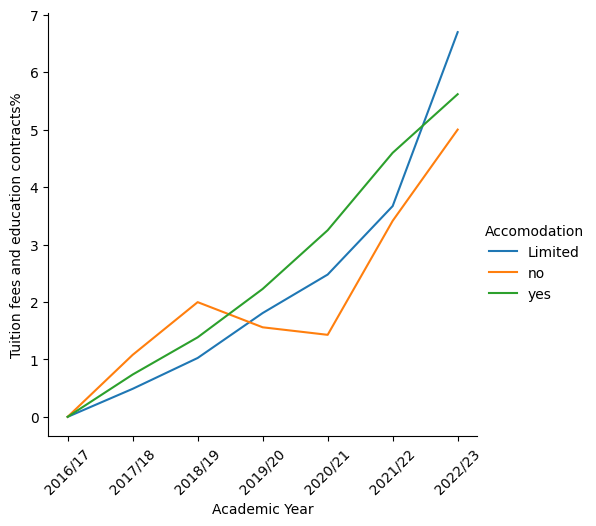

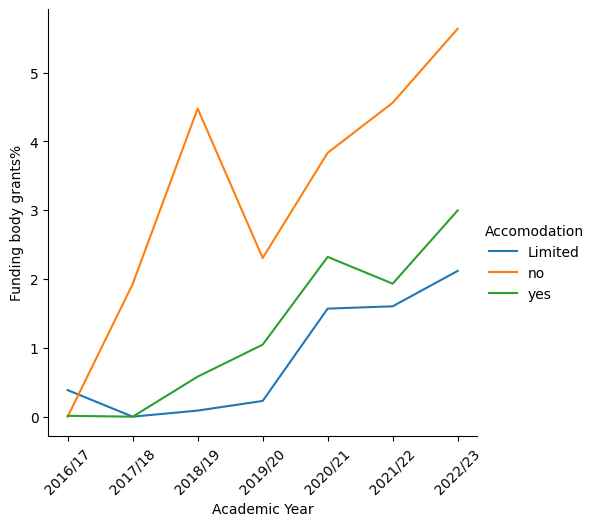

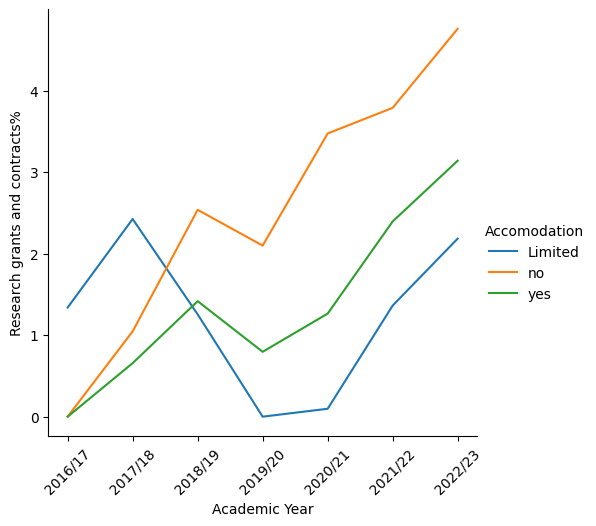

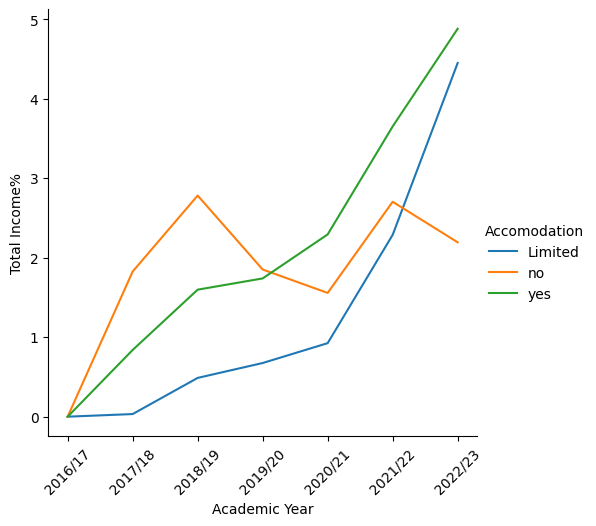

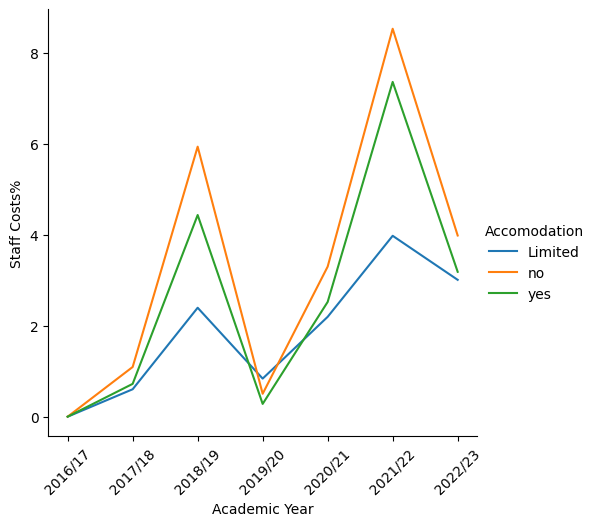

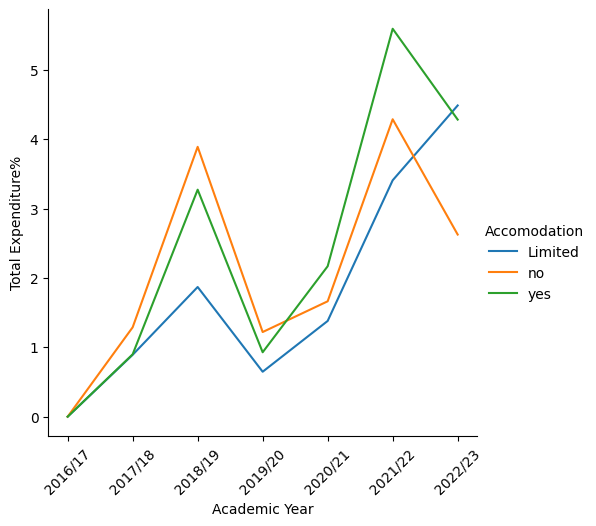

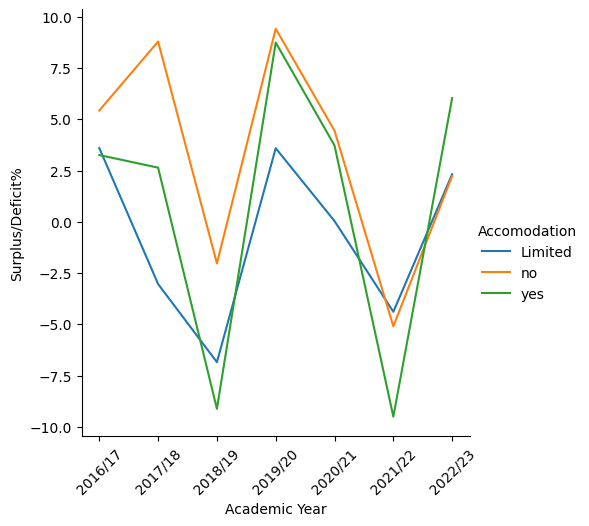

In [72]:
asso_ = sub_main.groupby(["Academic Year", "Accomodation"]).sum()

cat = ['yes', 'no', 'Limited']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Accomodation")

    plt.tick_params(axis = 'x', rotation = 45)

#### According to size(income)

In [73]:
sub_main["Income_group"].unique()

array(['IG1(>1500)', 'IG2(1000-1500)', 'IG3(750-1000)', 'IG4(500-750)',
       'IG5(400-500)', 'IG6(300-400)', 'IG7(200-400)', 'IG8(100-200)',
       'IG9(<100)'], dtype=object)

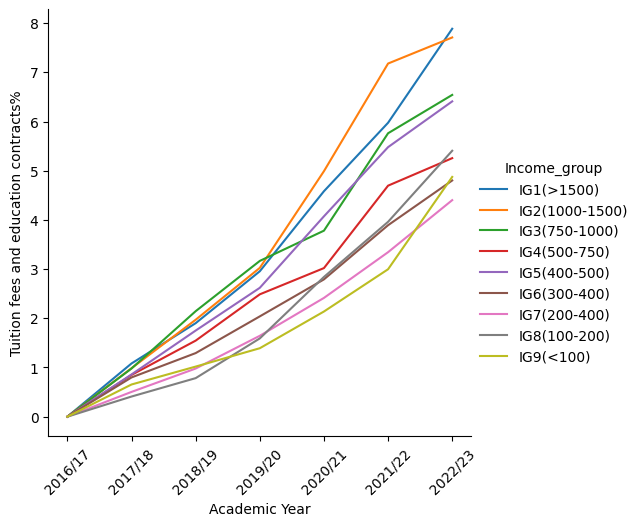

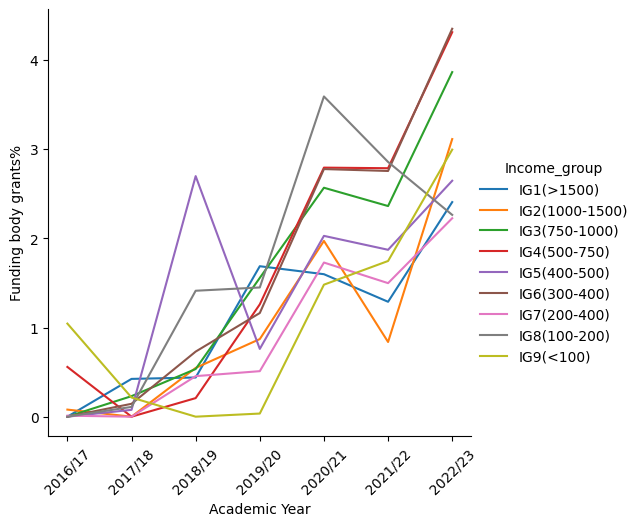

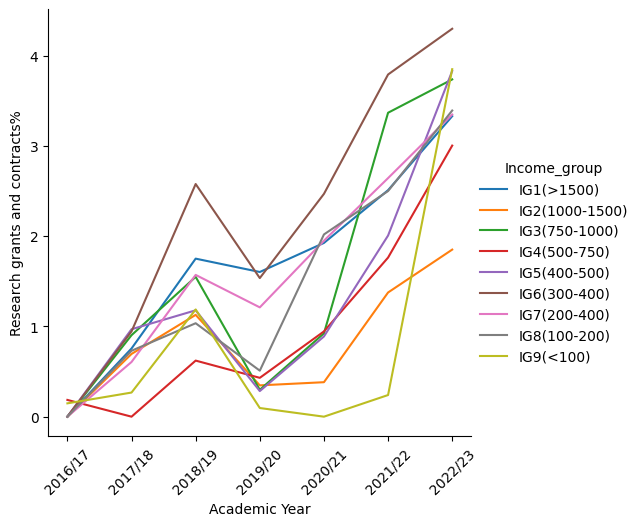

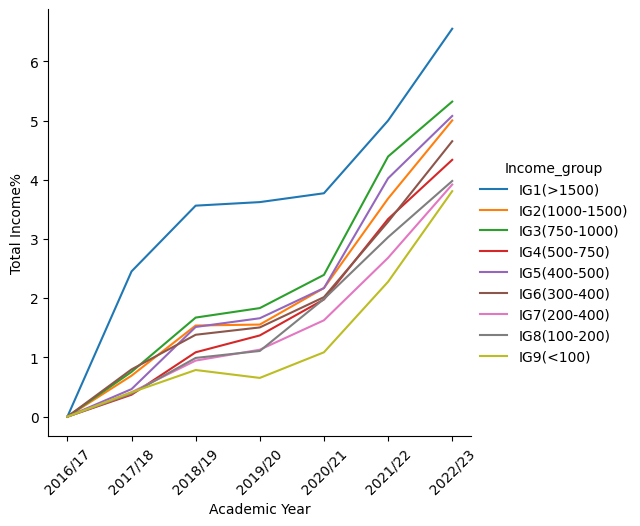

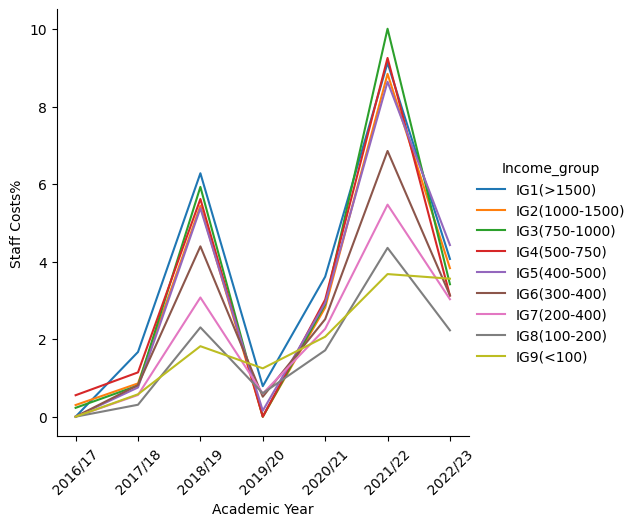

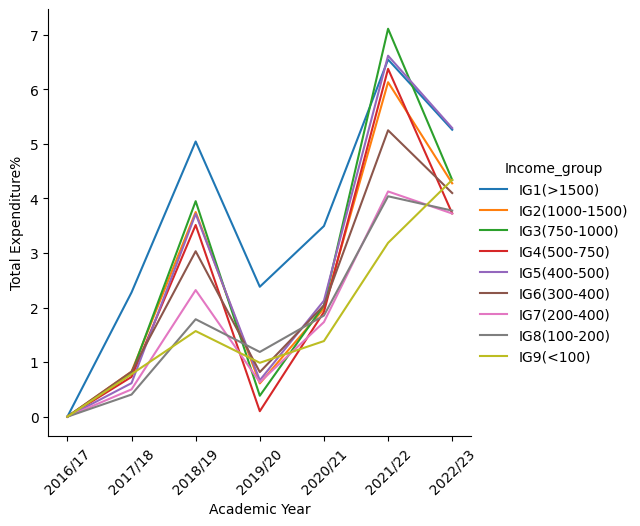

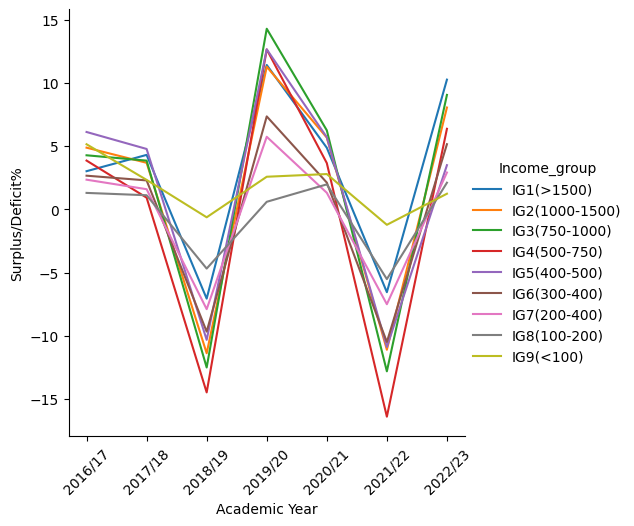

In [74]:
asso_ = sub_main.groupby(["Academic Year", "Income_group"]).sum()

cat = ['IG1(>1500)', 'IG2(1000-1500)', 'IG3(750-1000)', 'IG4(500-750)',
       'IG5(400-500)', 'IG6(300-400)', 'IG7(200-400)', 'IG8(100-200)',
       'IG9(<100)']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Income_group")

    plt.tick_params(axis = 'x', rotation = 45)

#### According to size(no. of students)

In [75]:
sub_main["Uni_size"].unique()

array(['S4(20k-30k)', 'S2(40k-50k)', 'S3(30k-40k)', 'S1(>50k)',
       'S6(10k-15k)', 'S5(15k-20k)', 'S8(1k-5k)', 'S7(5k-10k)', 'S9(<1k)'],
      dtype=object)

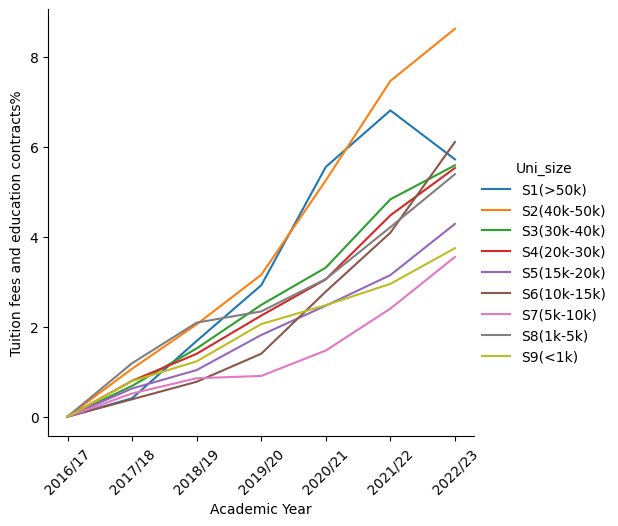

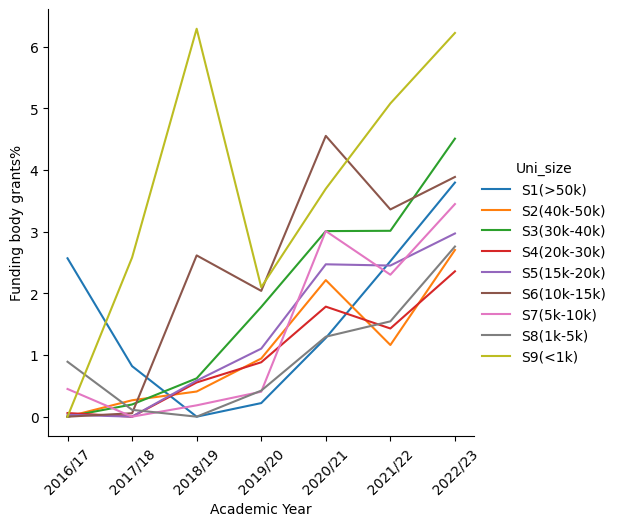

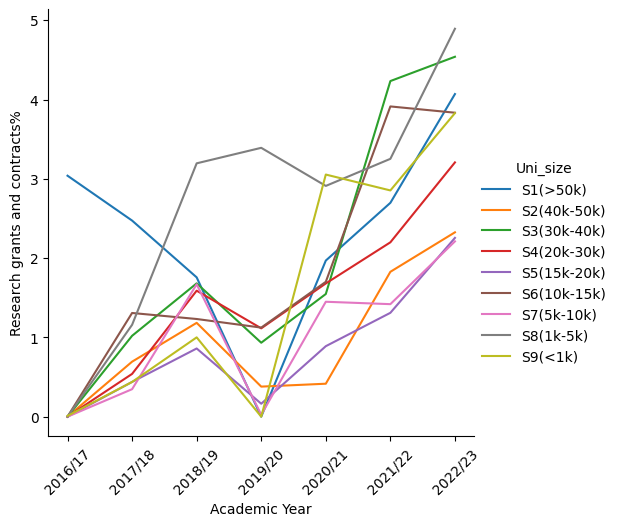

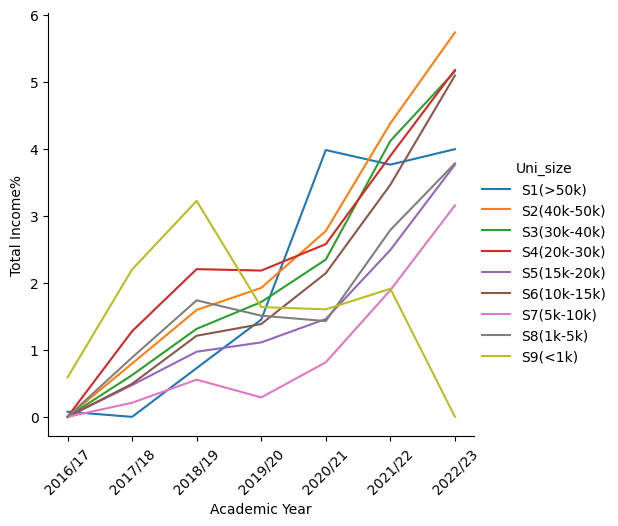

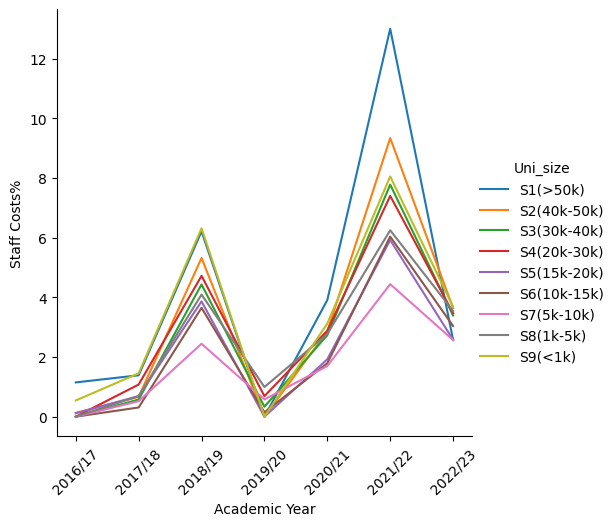

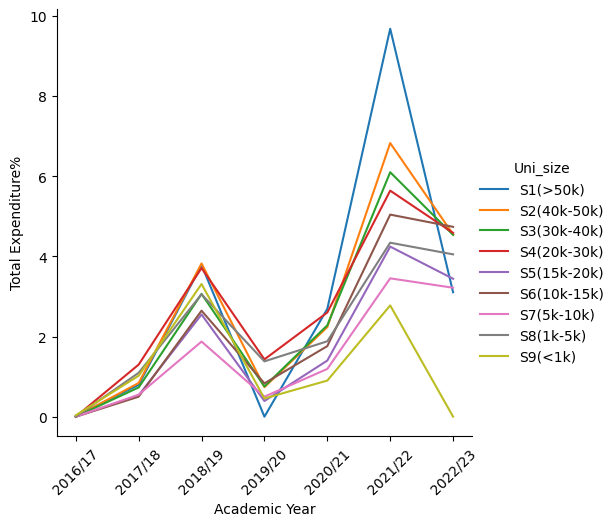

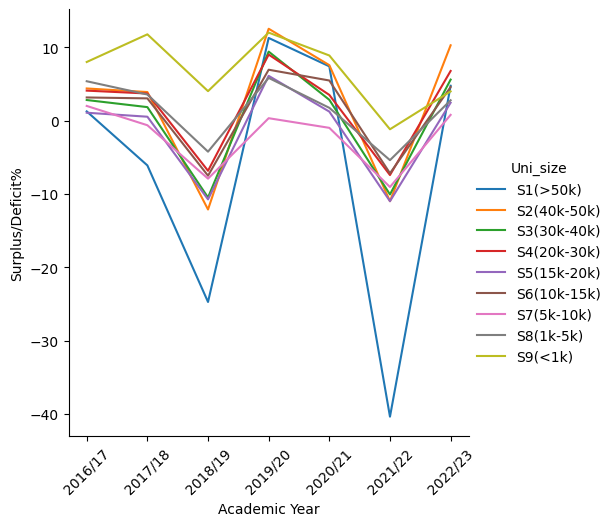

In [76]:
asso_ = sub_main.groupby(["Academic Year", "Uni_size"]).sum()

cat = ['S4(20k-30k)', 'S2(40k-50k)', 'S3(30k-40k)', 'S1(>50k)',
       'S6(10k-15k)', 'S5(15k-20k)', 'S8(1k-5k)', 'S7(5k-10k)', 'S9(<1k)']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Uni_size")

    plt.tick_params(axis = 'x', rotation = 45)

#### According to ranking (2021/22)

In [77]:
sub_main["Rank_group"].unique()

array(['R1', 'R2', 'R4', 'R3', 'R5', 'Unranked', 'R6', 'R7', 'R8', 'R9'],
      dtype=object)

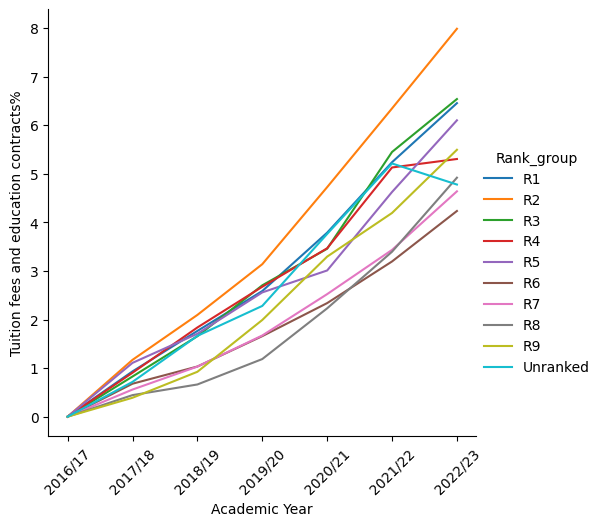

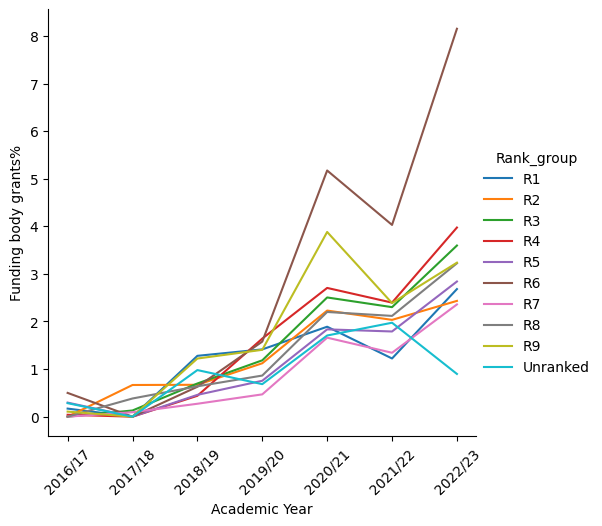

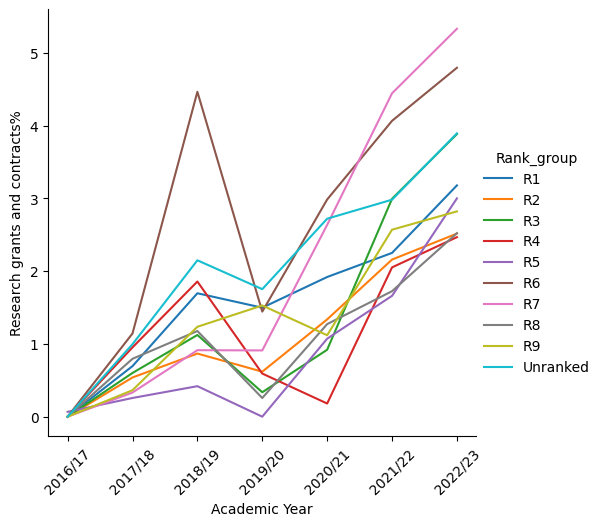

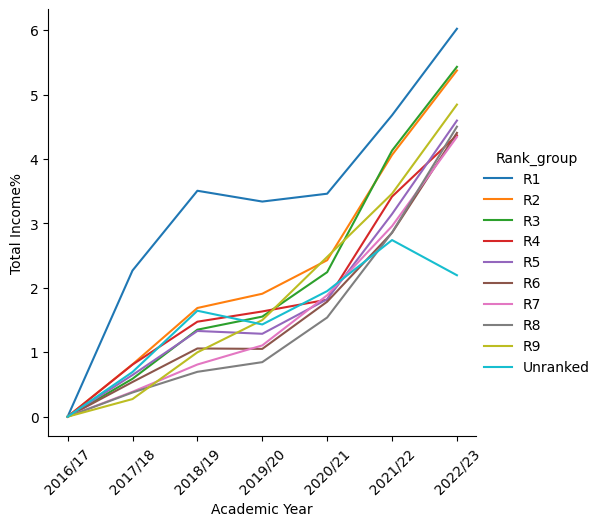

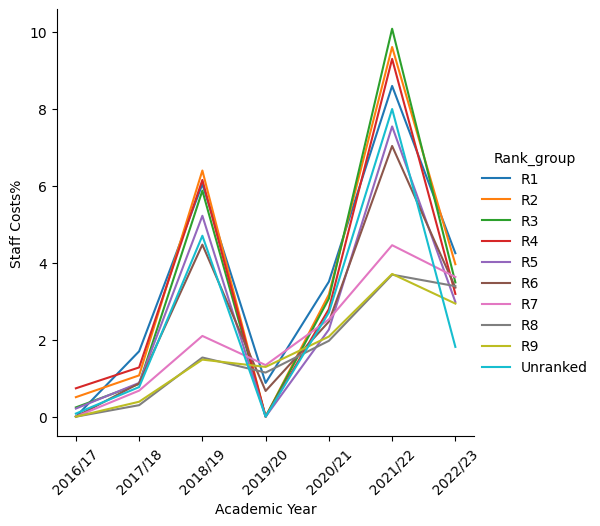

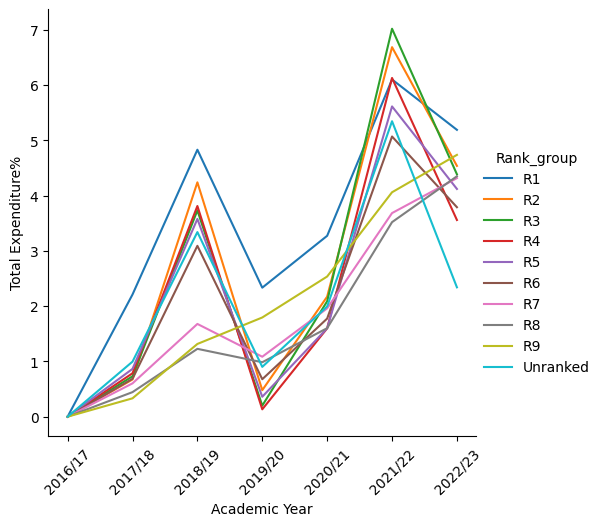

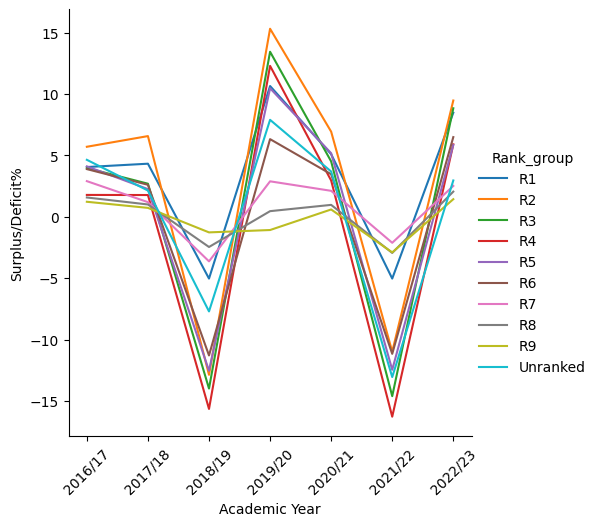

In [78]:
asso_ = sub_main.groupby(["Academic Year", "Rank_group"]).sum()

cat = ['R1', 'R2', 'R4', 'R3', 'R5', 'Unranked', 'R6', 'R7', 'R8', 'R9']

cols = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure"]

for col in cols:
    asso_[f"{col}%"] = 0
    for item in cat:
        indices = []
        values = []
        total = 0
        for each in range(len(asso_.index)):
            if item in asso_.index[each]:
                indices.append(asso_.index[each])

        for indi in indices:
            values.append(asso_.loc[indi, f"{col}"])
            total = total + asso_.loc[indi, f"{col}"]

        for indi in indices:
            new_value = 100 * (asso_.loc[indi, f"{col}"] - min(values))/total
            asso_.loc[indi, f"{col}%"] = new_value

asso_["Surplus/Deficit%"] = 0
for item in cat:
    indices = []
    
    for each in range(len(asso_.index)):
        if item in asso_.index[each]:
            indices.append(asso_.index[each])

    for indi in indices:
        new_value = 100 * (asso_.loc[indi, "Surplus/Deficit"]/asso_.loc[indi, "Total Income"])
        asso_.loc[indi, "Surplus/Deficit%"] = new_value
            
asso_

cols_plot = ["Tuition fees and education contracts", "Funding body grants", "Research grants and contracts", "Total Income",
        "Staff Costs", "Total Expenditure", "Surplus/Deficit"]

for col in cols_plot:

    sns.relplot(data = asso_,
                kind = "line",
                x = "Academic Year",
                y = f"{col}%",
                hue = "Rank_group")

    plt.tick_params(axis = 'x', rotation = 45)

### Exploring the share

In [79]:
# Functions for pie plots

def income_share(data, title):
    data = [data["Tuition fees and education contracts"].mean(),
            data["Funding body grants"].mean(),
            data["Research grants and contracts"].mean(),
            data["Other income"].mean(),
            data["Investment income"].mean(),
            data["Donations and endowments"].mean()] 
    keys = ["Tuition fees and education contracts",
            "Funding body grants",
            "Research grants and contracts",
            "Other income",
            "Investment income",
            "Donations and endowments"]
    
    palette_color = sns.color_palette('Set2') 
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.1f%%') 
    plt.title(title)
    plt.axis('on')
    plt.tight_layout()
    plt.show()

def cost_share(data, title):
    data = [data["Staff Costs"].mean(),
            data["Restructuring costs"].mean(),
            data["Other operating expenses"].mean(),
            data["Depreciation and amortisation"].mean(),
            data["Interest and other finance costs"].mean()]

    keys = ["Staff costs",
            "Restructuring costs",
            "Other operating expenses",
            "Depreciation and amortisation",
            "Interest and other finance costs"] 

    palette_color = sns.color_palette('Set2') 
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.1f%%') 
    plt.title(title)
    plt.axis('on')
    plt.tight_layout()
    plt.show()

In [70]:
post_1992_central = sub_main[sub_main["Association"] == 'Post 1992 with central institution roots']
post_1992_poly = sub_main[sub_main["Association"] == 'Post 1992 with polytechnic roots']
post_1992_other = sub_main[sub_main["Association"] == 'Post 1992 - other']
no_known_affiliation = sub_main[sub_main["Association"] == 'Other']

In [66]:
sub_main.head(2)

University  Country Academic Year  Total Income  \
0     The University of Oxford  England       2022/23      2924.682   
1  The University of Cambridge  England       2022/23      2518.255   

   Total Expenditure  Surplus/Deficit  Tuition fees and education contracts  \
0           2581.179          343.503                               504.244   
1           2317.852          200.403                               390.118   

   Funding body grants  Research grants and contracts   Staff Costs  \
0              229.247                        789.044  1.120000e+09   
1              207.607                        569.503  1.020640e+09   

   Other income  Investment income  Donations and endowments  Fees_UK  \
0      1034.740            180.515                   186.892  144.971   
1      1169.008             49.665                   132.354  132.651   

   Fees_international  Fees_EU  Fees_research/other  \
0             199.563   33.840               57.941   
1             182.201   27.905               25.745   

   Fees_non_credit_bearing_courses/other  Fees_FE_courses/other  \
0                                 67.929                    0.0   
1                                 21.616                    0.0   

   Fees_total_other  UK_students  EU_students  Non-EU_students  \
0           125.870          0.0          0.0              0.0   
1            47.361          0.0          0.0              0.0   

   Total_students    Association        Established Location       Funding  \
0             0.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   
1             0.0  Russell Group  Ancient(pre 1860)    Other  Public Bonds   

   Times Ranking 2023  UK_fps  EU_fps  Non-EU_fps Courses_type  \
0                 1.0     0.0     0.0         0.0          mix   
1                 3.0     0.0     0.0         0.0          mix   

           County      Region Accomodation Income_group     Uni_size  \
0     Oxfordshire  South East          yes   IG1(>1500)  S4(20k-30k)   
1  Cambridgeshire        East          yes   IG1(>1500)  S4(20k-30k)   

  Rank_group  
0         R1  
1         R1

In [77]:
post_1992_central[colss].mean()

Tuition fees and education contracts    37.786824
Funding body grants                     54.890000
Research grants and contracts            3.947765
Other income                             8.718382
Investment income                        0.494500
Donations and endowments                 0.528294
dtype: float64

In [75]:
import plotly.express as px

colss =  ["Tuition fees and education contracts", "Funding body grants",
                        "Research grants and contracts", "Other income", "Investment income",
                        "Donations and endowments"]

fig = px.pie(post_1992_central, values = post_1992_central[colss].sum(), names= colss, title='Population of European continent')
fig.show()

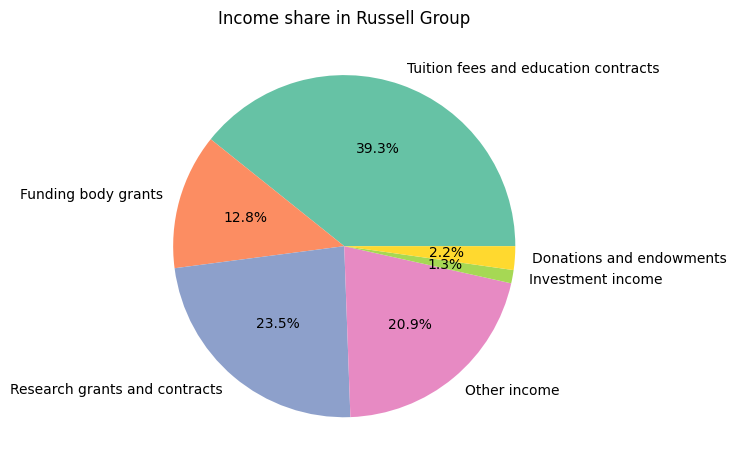

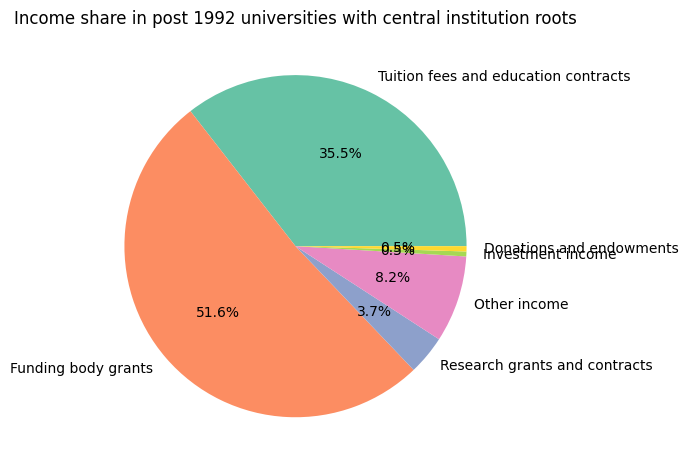

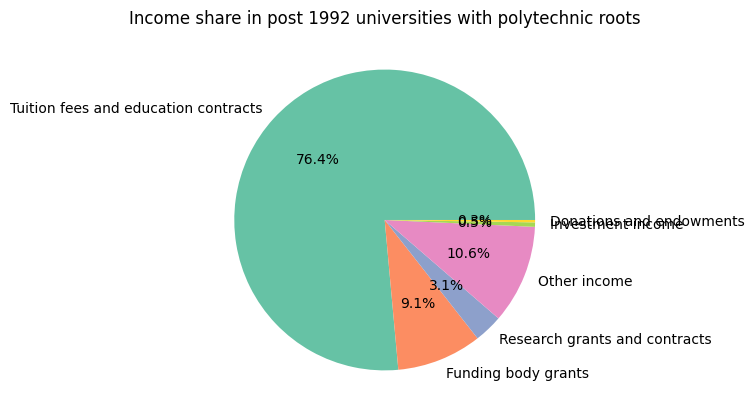

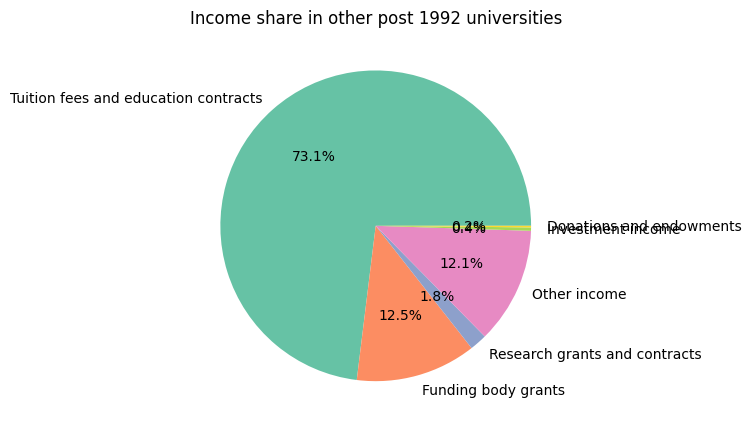

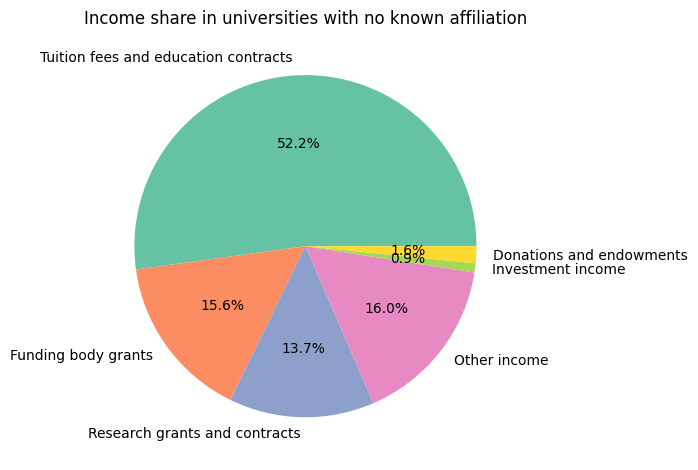

In [81]:
# Checking share of income and costs among all association

# Income Share
income_share(pl_russell, 'Income share in Russell Group')
income_share(post_1992_central, 'Income share in post 1992 universities with central institution roots')
income_share(post_1992_poly, 'Income share in post 1992 universities with polytechnic roots')
income_share(post_1992_other, 'Income share in other post 1992 universities')
income_share(no_known_affiliation, 'Income share in universities with no known affiliation')

In [83]:
# import os
# import transformers

# from transformers import pipeline
# # Load pre-trained sentiment-analysis pipeline from Hugging Face
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import TextClassificationPipeline

In [84]:
# # Set the cache directory explicitly
# cache_dir = os.path.expanduser('~/.cache/huggingface/transformers')

# # Loa d pre-trained sentiment-analysis pipeline from Hugging Face
# model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# # Download the tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=cache_dir)
# model = AutoModelForSequenceClassification.from_pretrained(model_name, cache_dir=cache_dir)

# from transformers import TextClassificationPipeline

# classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, framework='pt')